# Estrategia de Retención de Clientes para Model Fitness mediante Análisis Predictivo

## Introducción

Model Fitness, una cadena de gimnasios, busca desarrollar una estrategia basada en datos para mejorar la retención de sus clientes y reducir la pérdida de usuarios. El objetivo principal es predecir la probabilidad de que un cliente cancele su membresía el próximo mes y, en base a estos análisis, crear perfiles de usuarios típicos y determinar los factores que más impactan la cancelación.

El proyecto implica:

1. Análisis Exploratorio de Datos (EDA):
- Inspeccionar el dataset para detectar valores faltantes y obtener estadísticas descriptivas.
- Comparar los valores medios de las características entre clientes que han cancelado y los que no.
- Visualizar distribuciones de características y crear una matriz de correlación.

2. Construcción de Modelos Predictivos:
- Dividir los datos en conjuntos de entrenamiento y validación.
- Entrenar modelos de regresión logística y bosque aleatorio para predecir la cancelación de clientes.
- Evaluar el rendimiento de los modelos utilizando métricas de exactitud, precisión y recall.

3. Clustering de Usuarios:
- Estandarizar los datos y crear un dendrograma para estimar el número de clústeres.
- Entrenar un modelo K-means para identificar clústeres de clientes.
- Análisis de características y tasas de cancelación dentro de cada clúster para identificar patrones y comportamientos específicos.

4. Conclusiones y Recomendaciones:
- Identificación de grupos objetivo que requieren estrategias de retención específicas.
- Sugerencias de medidas para reducir la rotación de clientes, como programas de fidelización e incentivos personalizados.
- Propuestas para mejorar la atención al cliente basadas en los patrones observados en el análisis de datos.

### Importación de librerías

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### Cargar Datos

In [2]:
# descargar los datos
data = pd.read_csv('/datasets/gym_churn_us.csv')

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print("Vista preliminar de los datos:")
display(data.head())

Vista preliminar de los datos:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Preparación de datos

In [3]:
def initial_data_analysis(data):
    
    # Mostrar el tamaño del dataset
    print("\nTamaño del dataset:")
    print(data.shape)
    print("\n" + "-"*50 + "\n")
    
    # Información del dataset
    print("\nInformación del dataset:")
    data_info = data.info()
    print("\n" + "-"*50 + "\n")

    # Verificar valores nulos
    print("\nValores nulos en cada columna:")
    missing_values = data.isnull().sum()
    print(missing_values)
    print("\n" + "-"*50 + "\n")

    # Verificar valores duplicados
    print("\nNúmero de filas duplicadas:")
    duplicates = data.duplicated().sum()
    print(duplicates)
    print("\n" + "-"*50 + "\n")

    # Resumen estadístico del dataset
    print("\nResumen estadístico del dataset:")
    stats_summary = data.describe()
    display(stats_summary)
    
    return data_info, missing_values, duplicates, stats_summary

# Realizar el análisis inicial del dataset
data_info, missing_values, duplicates, stats_summary = initial_data_analysis(data)



Tamaño del dataset:
(4000, 14)

--------------------------------------------------


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime 

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
# Convertir los nombres de las columnas a minúsculas
data.columns = [col.lower() for col in data.columns]

# Renombrar columnas para mayor claridad
data.rename(columns={
    'avg_additional_charges_total': 'total_additional_charges',
    'avg_class_frequency_total': 'total_class_frequency',
    'avg_class_frequency_current_month': 'current_month_class_frequency'
}, inplace=True)

# Verificar los nuevos nombres de las columnas
print(data.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age', 'total_additional_charges',
       'month_to_end_contract', 'lifetime', 'total_class_frequency',
       'current_month_class_frequency', 'churn'],
      dtype='object')


El dataset de Model Fitness contiene 4000 registros de usuarios y 14 características, sin valores nulos ni duplicados, y con tipos de datos correctos. Las estadísticas descriptivas iniciales revelan que la edad promedio de los usuarios es de 29 años, con un gasto adicional promedio de 147 unidades monetarias y una frecuencia promedio de visitas a clases de 1.88 veces por semana. La tasa de cancelación es del 26.5%.

## Análisis Exploratorio de Datos (EDA)

### Valores medios y desviación estándar por grupo

In [5]:
# Valores medios por grupo (churn vs. no churn)
conteo_churn = data['churn'].value_counts()
print(conteo_churn)

porcentaje_churn = conteo_churn[1] / len(data) * 100
print(f"{porcentaje_churn:.1f}% de los miembros se dieron de baja")
print("\n" + "-"*50 + "\n")

# Valores medios de características por grupo
medias_churn = data.groupby('churn').mean().T
display(medias_churn)

0    2939
1    1061
Name: churn, dtype: int64
26.5% de los miembros se dieron de baja

--------------------------------------------------



churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
total_additional_charges,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


El análisis muestra que el 26.5% de los miembros del gimnasio se dieron de baja. Al comparar las características promedio entre los clientes que se quedaron y los que se dieron de baja, se observa que los primeros suelen vivir más cerca del gimnasio, trabajar para una empresa asociada, y haber ingresado a través de promociones con amigos. Además, los que se quedaron tienden a tener contratos más largos, participar en visitas grupales, ser ligeramente mayores y gastar más en servicios adicionales del gimnasio. También muestran un mayor tiempo de membresía y frecuencias de clase tanto totales como del mes actual más altas que aquellos que se dieron de baja.

### Visualización de distribuciones específicas por grupo

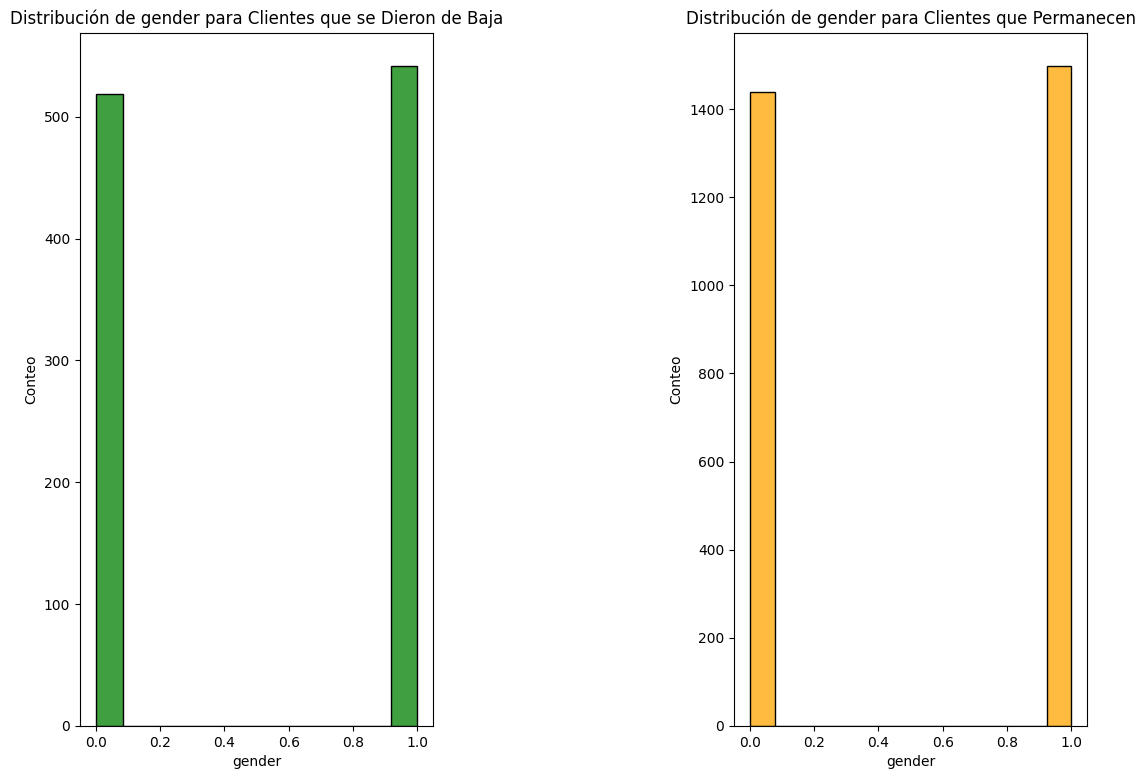

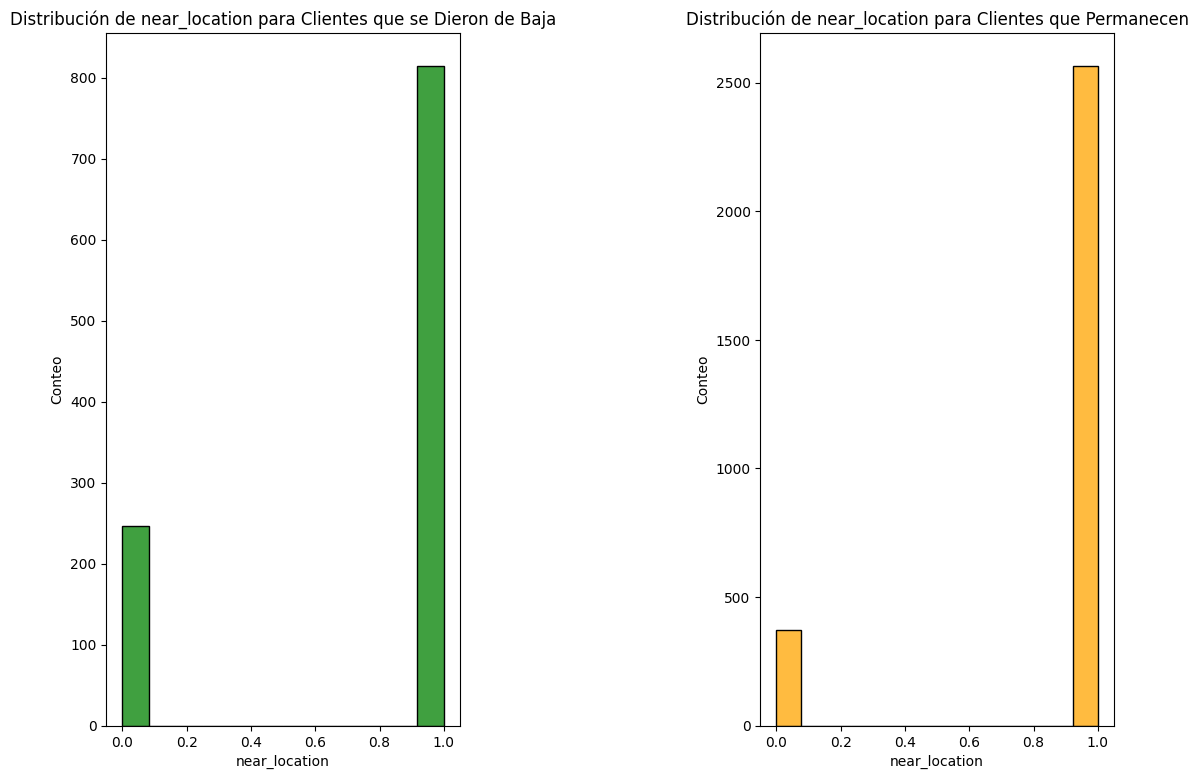

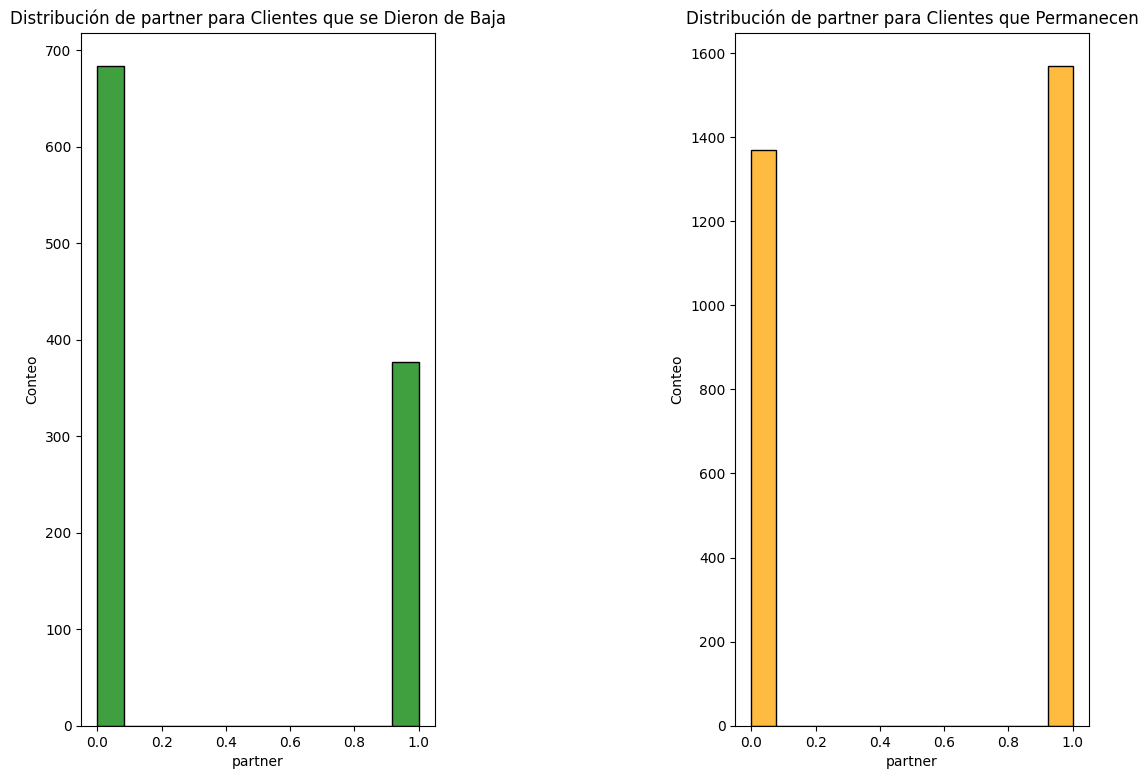

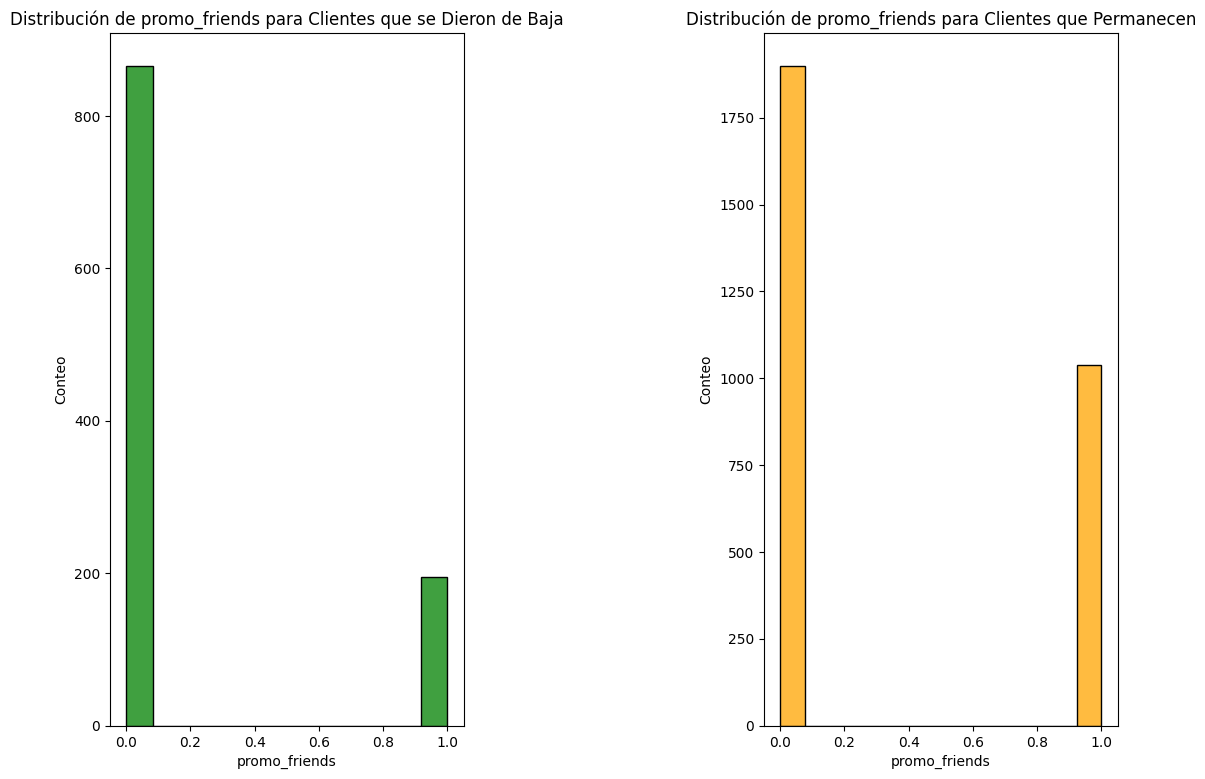

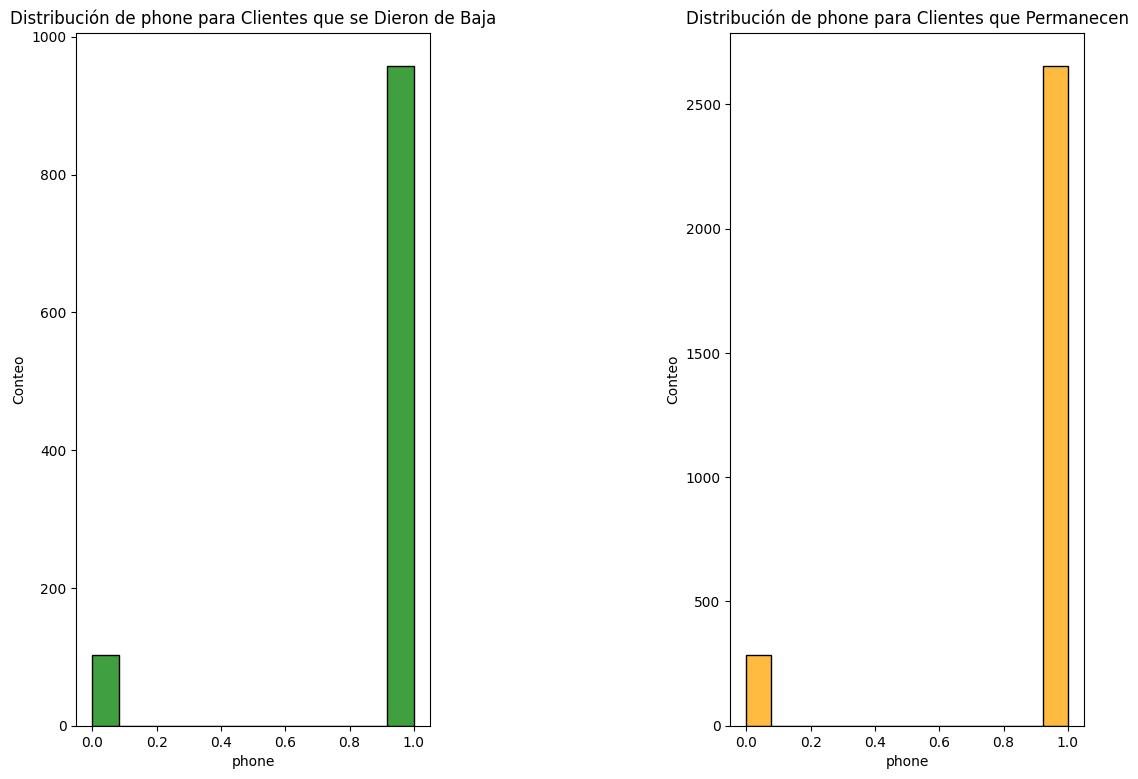

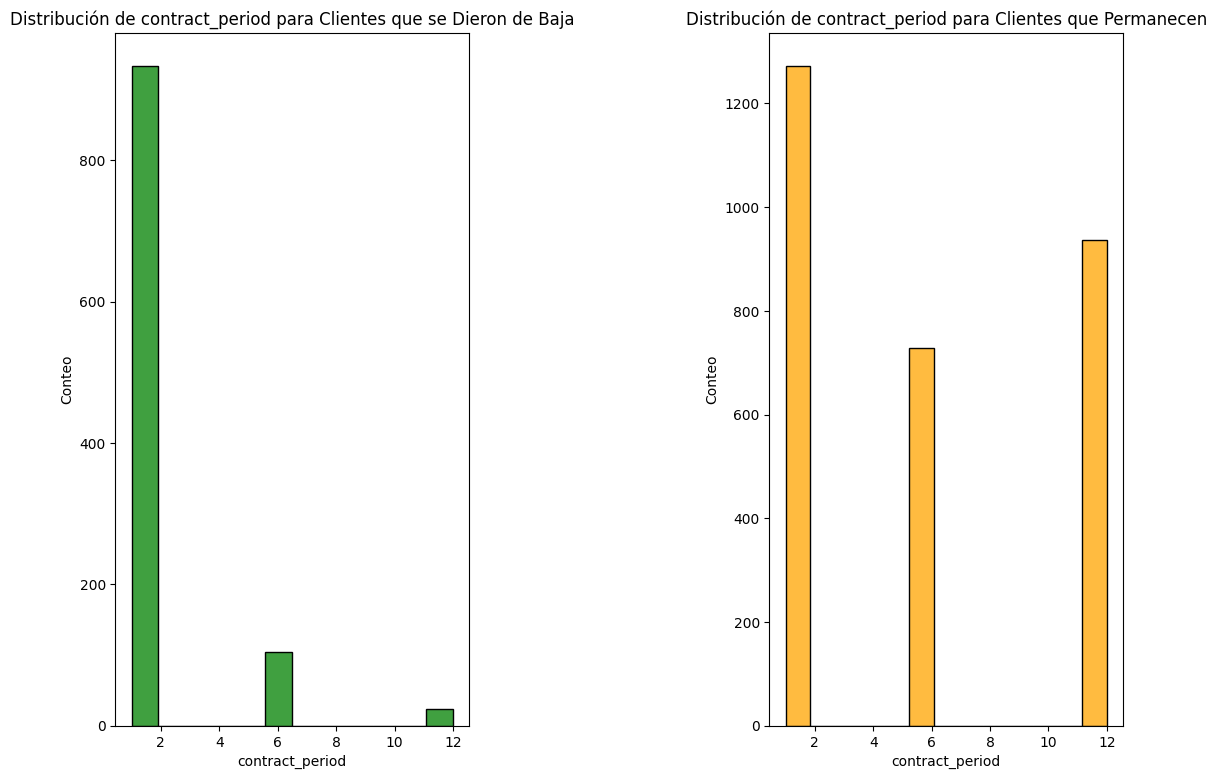

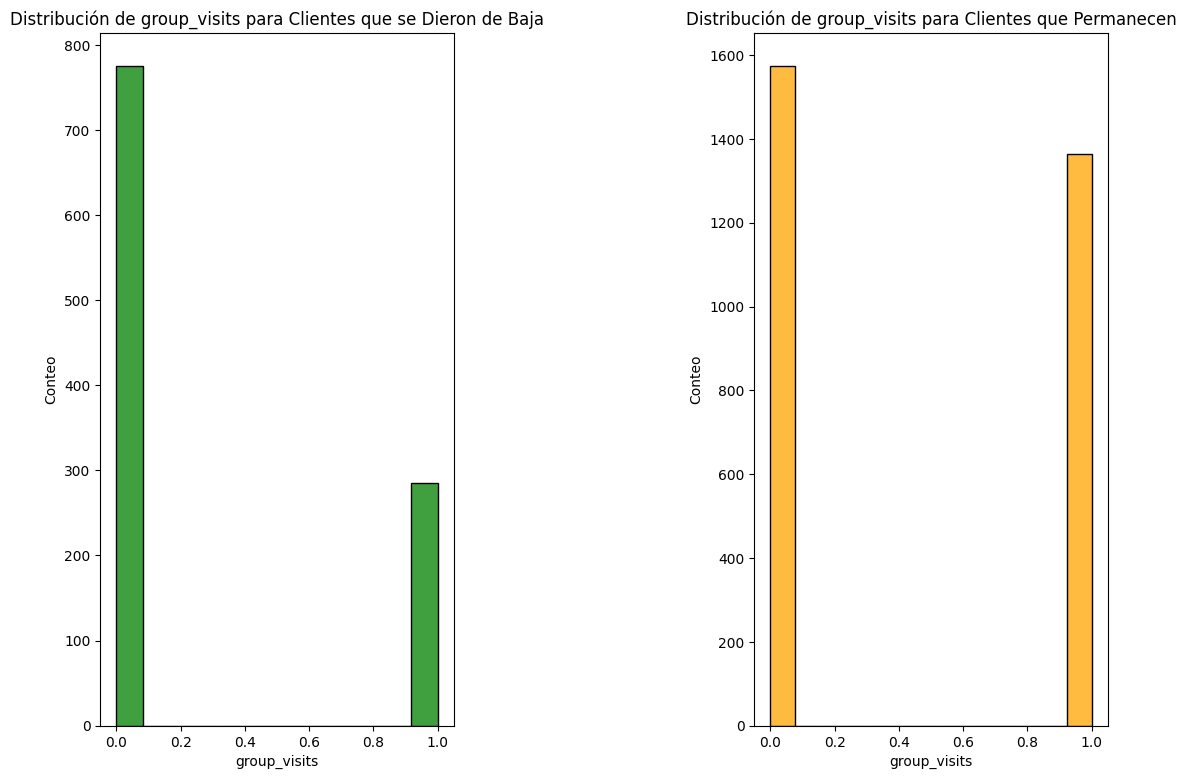

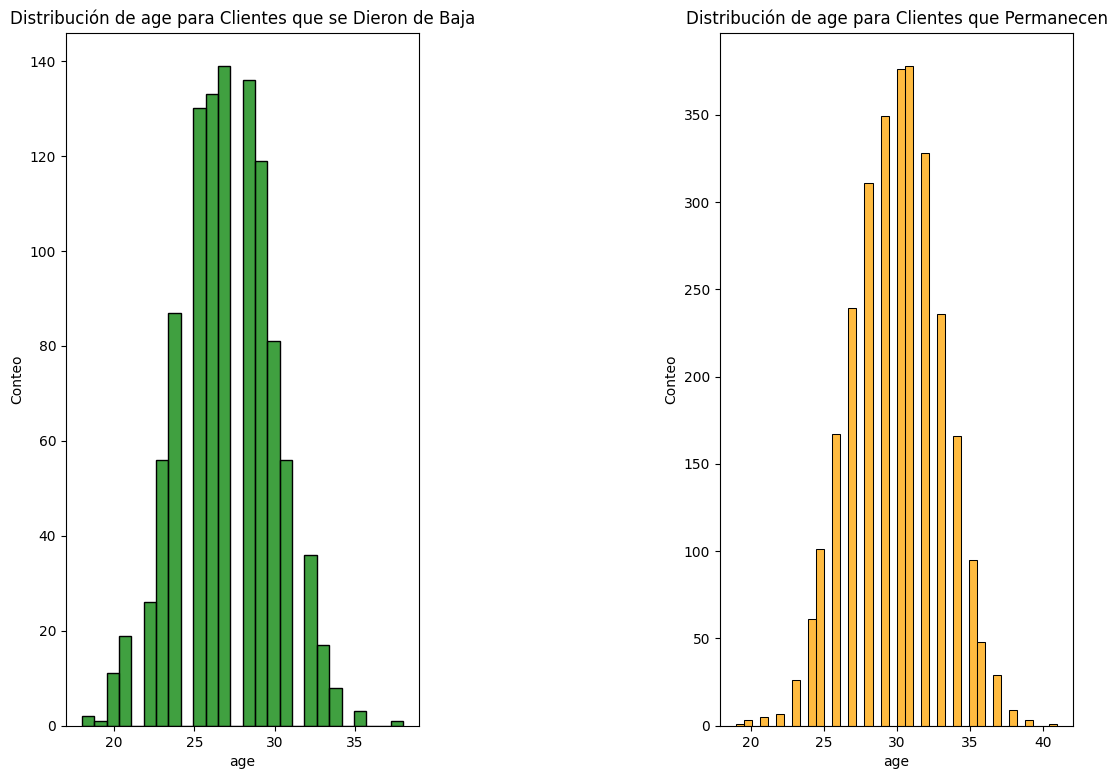

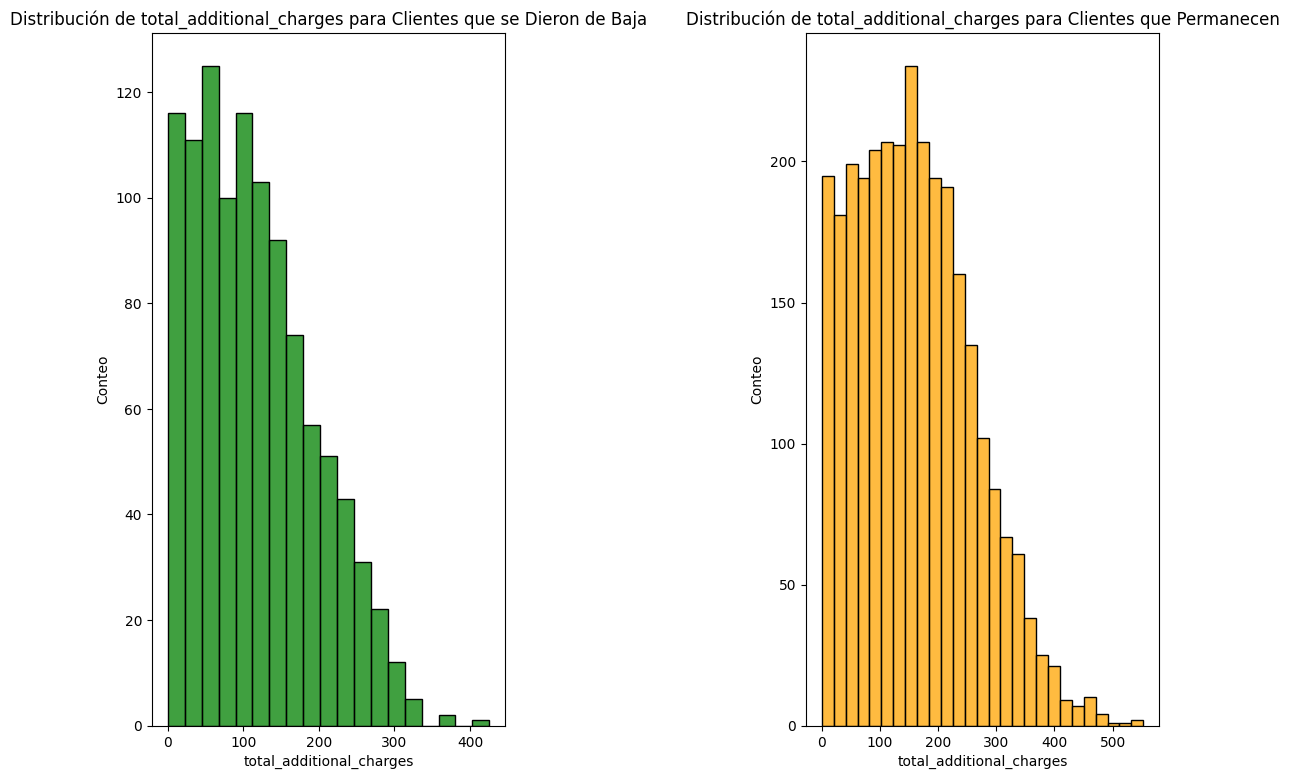

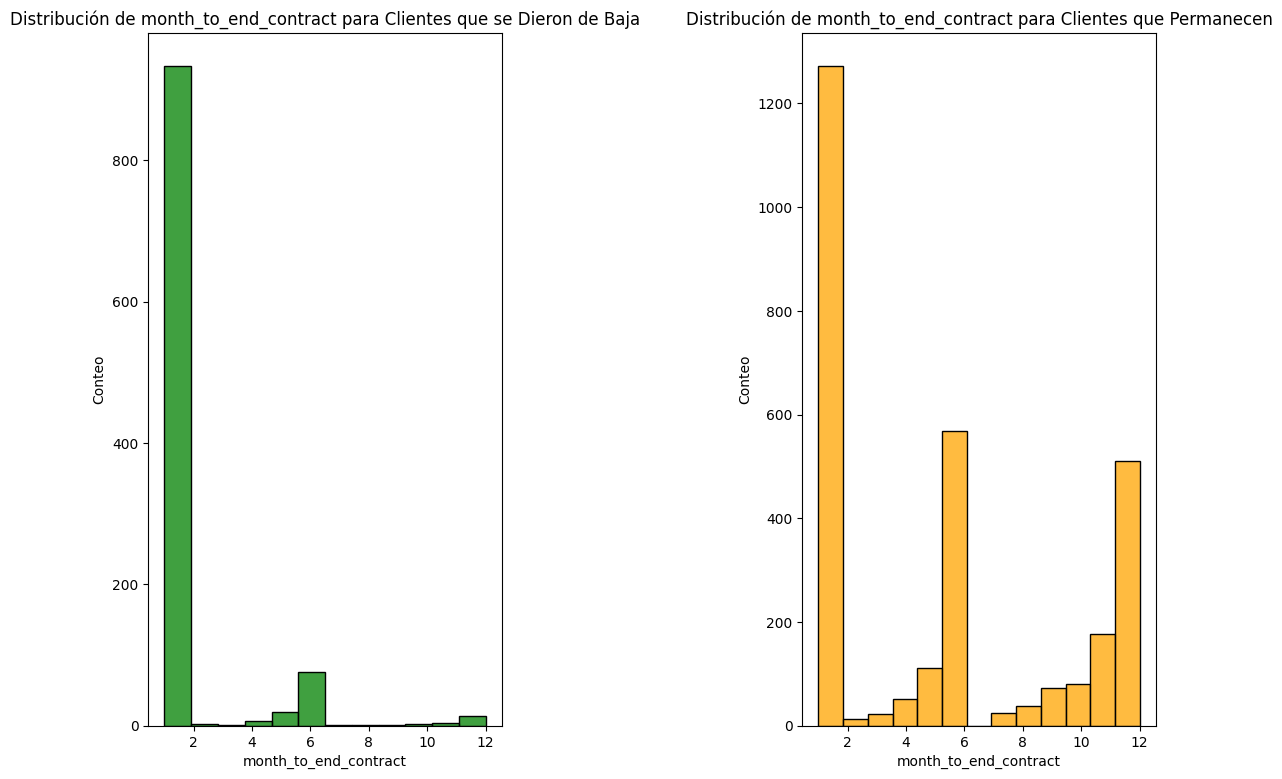

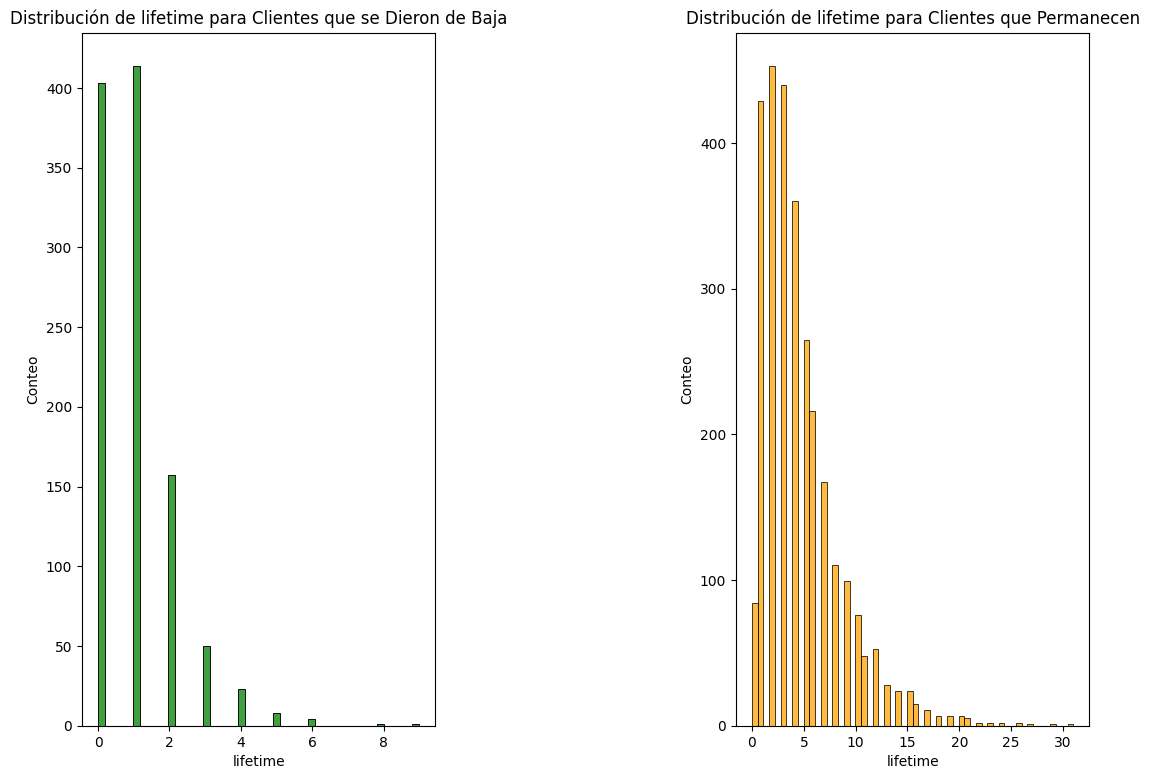

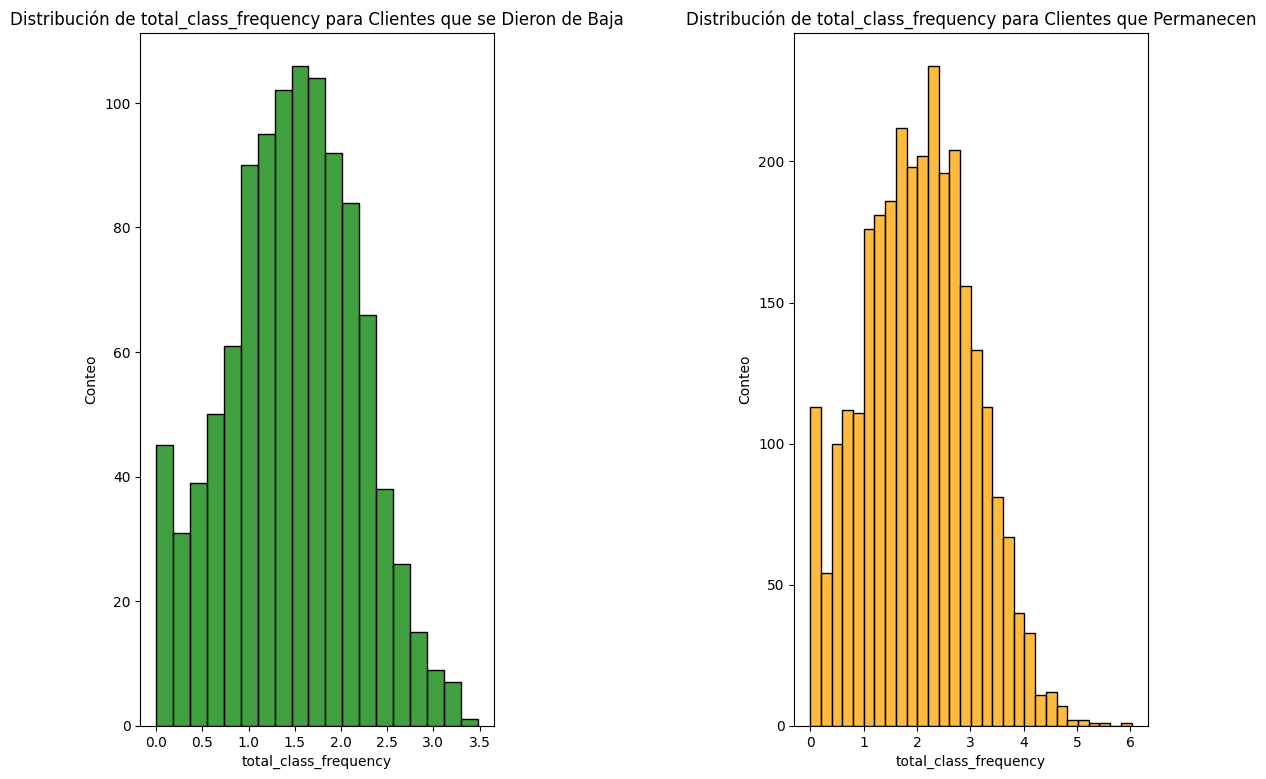

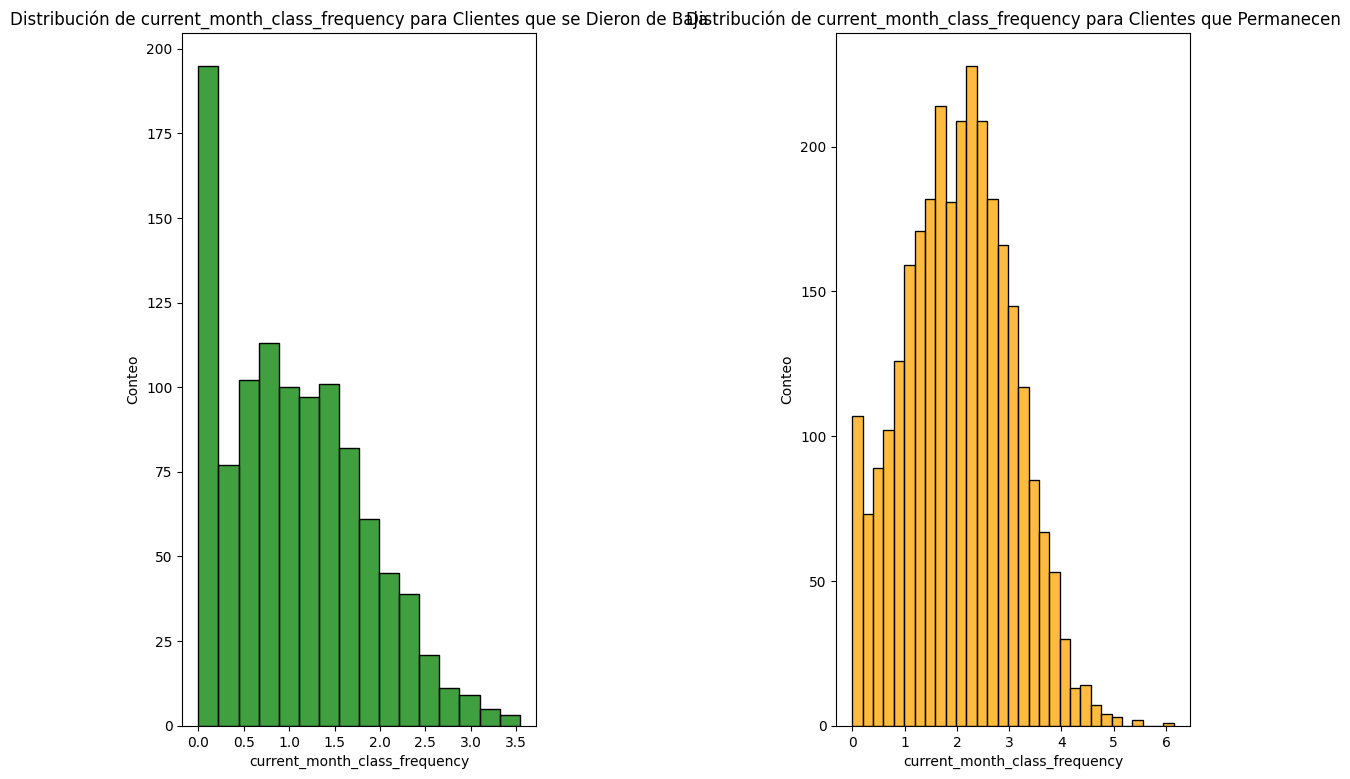

In [6]:
# Visualización de distribuciones para cada grupo (churn vs. no churn)
baja = data[data['churn'] == 1]
permanece = data[data['churn'] == 0]

for var in data.columns:
    if var != 'churn':
        plt.figure(figsize=(13, 9))
        plt.subplot(1, 2, 1)
        sns.histplot(data=baja, x=var, kde=False, color='green', label='Baja')
        plt.xlabel(var)
        plt.ylabel('Conteo')
        plt.title(f'Distribución de {var} para Clientes que se Dieron de Baja')
        
        plt.subplot(1, 2, 2)
        sns.histplot(data=permanece, x=var, kde=False, color='orange', label='Permanece')
        plt.xlabel(var)
        plt.ylabel('Conteo')
        plt.title(f'Distribución de {var} para Clientes que Permanecen')
        plt.subplots_adjust(wspace=0.85)
        plt.show()

Al analizar las distribuciones de las características entre los clientes que se **dieron de baja** y los que **permanecieron**, se observa lo siguiente:

- Para la característica de **ubicación cercana al gimnasio**, se nota que la mayoría de los clientes que permanecen viven o trabajan cerca del gimnasio, lo cual sugiere que la conveniencia juega un papel crucial en la retención. En contraste, los clientes que se dieron de baja muestran una distribución menos concentrada en la proximidad al gimnasio.

- En relación con **la asociación con empresas y promociones de amigos**, los clientes que permanecen tienen una mayor proporción de pertenencia a empresas asociadas y de haberse registrado a través de promociones de amigos. Esto indica que las relaciones corporativas y las recomendaciones personales son factores que influyen positivamente en la permanencia. En contraste, estos factores son menos comunes entre los clientes que se dieron de baja.

- Respecto al **período de contrato**, los clientes que permanecen muestran una distribución con contratos más largos en comparación con aquellos que se dieron de baja, quienes tienen una proporción significativa de contratos más cortos. Esto sugiere que los contratos más largos están asociados con una mayor probabilidad de permanencia.

- En cuanto a la participación en **sesiones grupales**, los clientes que permanecen tienen una participación más alta en comparación con los que se dieron de baja. Esta diferencia indica que la participación en actividades grupales podría fomentar la retención al crear un sentido de comunidad y compromiso con el gimnasio.

- Finalmente, en términos de **gastos adicionales en servicios del gimnasio**, los clientes que permanecen tienden a gastar más en comparación con los que se dieron de baja. Esto sugiere que los clientes más comprometidos con los servicios y facilidades adicionales del gimnasio tienen una mayor probabilidad de permanecer.

En resumen, estas observaciones destacan la importancia de la proximidad geográfica, la participación en programas de empresa asociada y promociones de amigos, la duración del contrato, la participación en sesiones grupales y el gasto en servicios adicionales como factores clave que influyen en la retención de clientes en el gimnasio.


### Matriz de correlación y eliminación de variables altamente correlacionadas

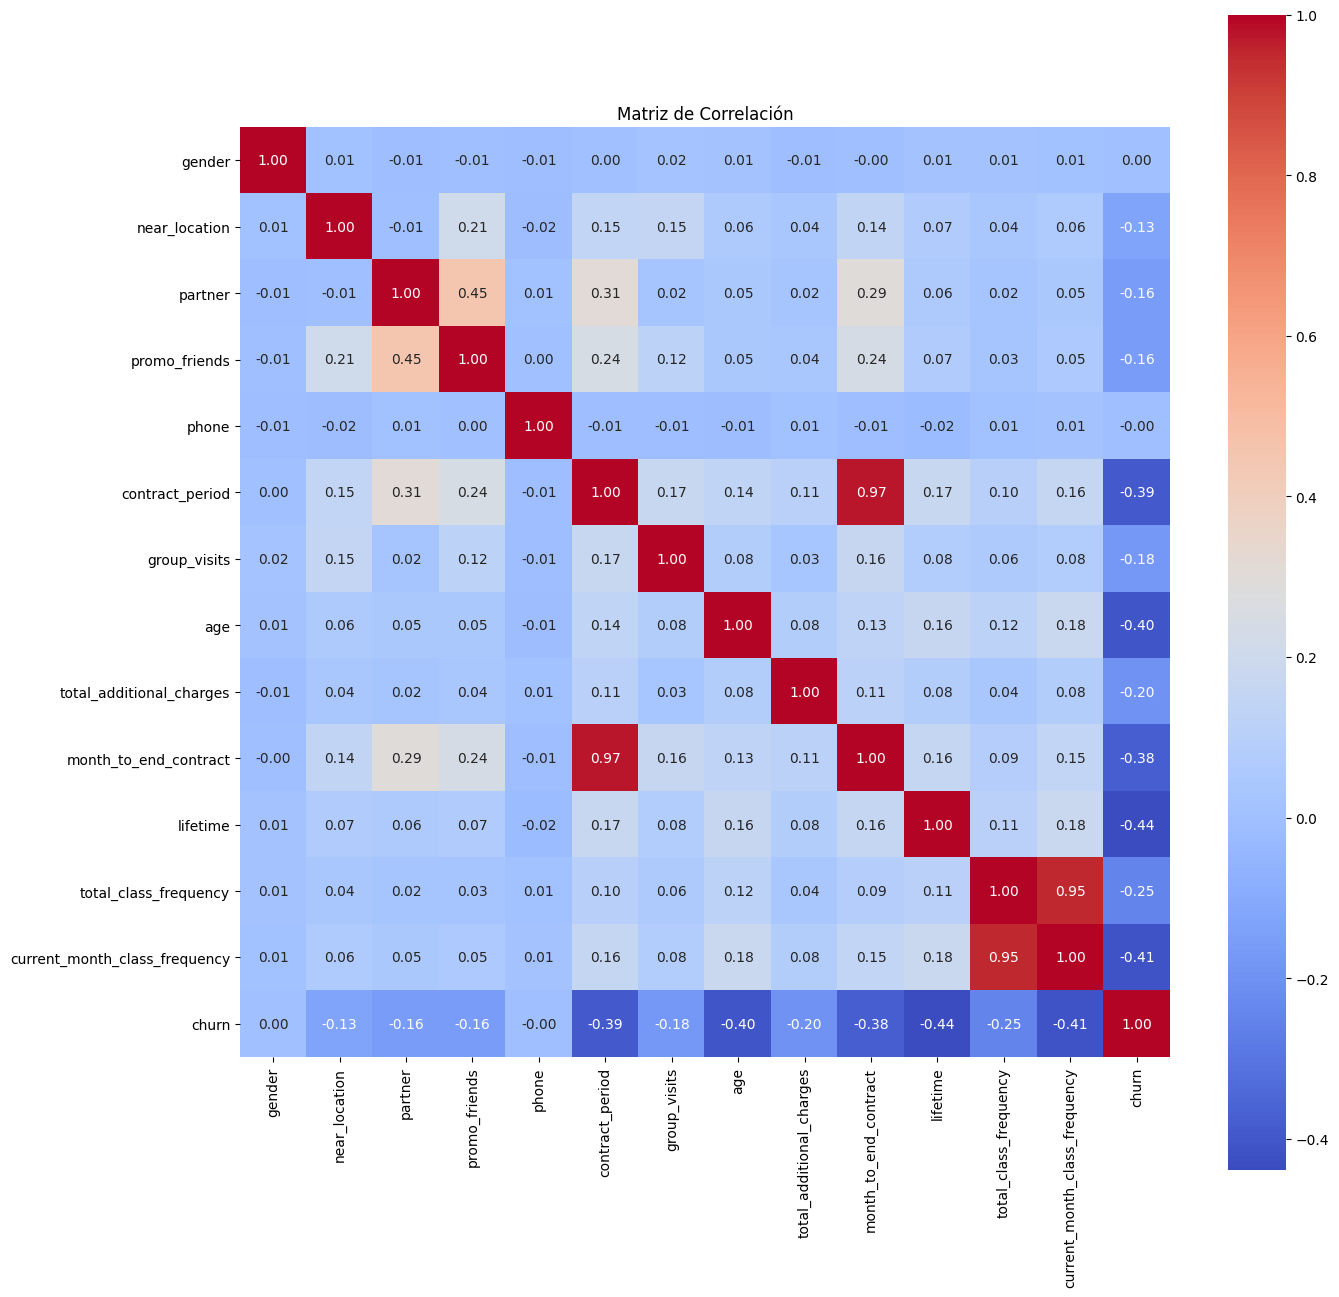

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age', 'total_additional_charges',
       'lifetime', 'total_class_frequency', 'churn'],
      dtype='object')


In [7]:
# Crear una matriz de correlación
matriz_correlacion = data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacion, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

# Eliminar columnas altamente correlacionadas si es necesario
columnas_a_eliminar = ['month_to_end_contract', 'current_month_class_frequency']
columnas_presentes = [col for col in columnas_a_eliminar if col in data.columns]
if columnas_presentes:
    data = data.drop(columns=columnas_presentes)
print(data.columns)



La matriz de correlación revela varias relaciones entre las características de los clientes de Model Fitness. Observamos una fuerte correlación positiva entre la duración del contrato y el número de meses restantes para que finalice el contrato, lo cual es esperado ya que son medidas relacionadas. Además, encontramos una correlación significativa entre la frecuencia total de clases y la frecuencia de clases en el mes actual, lo cual indica que los clientes que asisten más frecuentemente a clases tienden a mantener esa regularidad. Estas relaciones son importantes para entender los factores que podrían influir en la cancelación de los clientes.


## Construcción de un modelo de clasificación binaria para predecir la cancelación de usuarios

### División de los datos en conjuntos de entrenamiento y validación

In [8]:
X = data.drop('churn', axis=1)
y = data['churn']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

### Entrenamiento del modelo en el conjunto de entrenamiento

In [9]:
# Inicializar modelos
lr_model = LogisticRegression(random_state=0, max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Entrenar modelos
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Evaluación de la precisión, precisión y recall para ambos modelos utilizando los datos de validación

In [10]:
def print_all_metrics(y_true, y_pred, y_proba, title='Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

# Predicciones y probabilidades para regresión logística
lr_predictions = lr_model.predict(X_val)
lr_probabilities = lr_model.predict_proba(X_val)[:, 1]
print_all_metrics(y_val, lr_predictions, lr_probabilities, title='Métricas para regresión logística:')

print("\n" + "-"*50 + "\n")

# Predicciones y probabilidades para bosque aleatorio
rf_predictions = rf_model.predict(X_val)
rf_probabilities = rf_model.predict_proba(X_val)[:, 1]
print_all_metrics(y_val, rf_predictions, rf_probabilities, title='Métricas para bosque aleatorio:')

Métricas para regresión logística:
	Accuracy: 0.90
	Precision: 0.78
	Recall: 0.81

--------------------------------------------------

Métricas para bosque aleatorio:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77


Ambos modelos, regresión logística y bosque aleatorio, mostraron un desempeño sólido en la predicción de la cancelación de clientes en Model Fitness. La regresión logística alcanzó una precisión del 90%, indicando que acertó la mayoría de las veces. Además, tuvo una precisión del 78%, lo que significa que cuando predijo la cancelación de un cliente, generalmente acertó. El recall fue del 81%, capturando una buena proporción de los clientes que realmente se dieron de baja. Por otro lado, el modelo de bosque aleatorio alcanzó una precisión ligeramente inferior del 89%, con una precisión y recall similares al modelo de regresión logística (78% y 77%, respectivamente). En conclusión, ambos modelos mostraron un desempeño satisfactorio, siendo la regresión logística ligeramente superior en términos de precisión y recall.

## Creación de Clústeres de Usuarios

### Estandarización de los datos

In [11]:
# Estandarización de los datos
sc = StandardScaler()
x_sc = sc.fit_transform(data)

### Visualización de un dendrograma

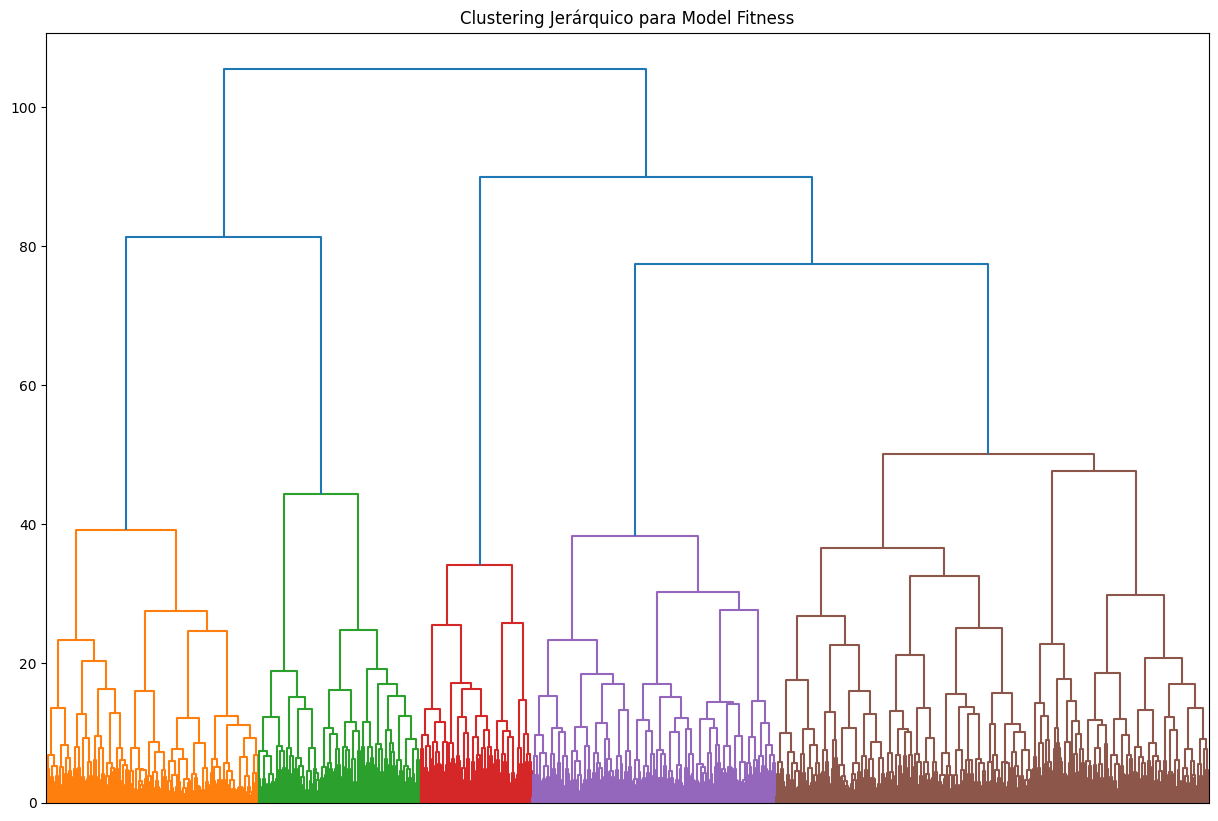

In [12]:
# Calcular el enlace jerárquico
linked = linkage(x_sc, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Clustering Jerárquico para Model Fitness')
plt.show()

El clustering jerárquico aplicado a los datos de Model Fitness revela distintos grupos de usuarios basados en características similares. A continuación se presentan las principales conclusiones obtenidas:

1. **Estandarización de los Datos:** Utilizamos la estandarización de datos para asegurar que todas las características tuvieran la misma escala, facilitando así la comparación y agrupamiento.

2. **Dendrograma Personalizado:** El dendrograma generado muestra la estructura jerárquica de los clusters. Se personalizaron los colores para resaltar diferentes niveles de agrupamiento, permitiendo una visualización clara de cómo los usuarios se agrupan según similitudes en sus características.

3. **Número de Clústeres:** Decidimos usar un método de clustering que dividió a los usuarios en 5 clusters distintos. Cada cluster muestra perfiles de usuarios con características particulares en términos de género, proximidad al gimnasio, participación en programas de socios, entre otros.

4. **Análisis de Características por Cluster:** Observamos que:
   - **Cluster 2** tiene la mayor cantidad de usuarios y muestra valores promedio más bajos en casi todas las características, pero sorprendentemente tiene la tasa más alta de churn (cancelación de membresía).
   - **Cluster 4** destaca por tener los valores más altos en todas las características y la tasa más baja de churn, indicando clientes altamente comprometidos.
   - **Cluster 0** presenta una tasa extremadamente baja de churn, lo cual sugiere una fidelidad notable entre sus miembros.
   
5. **Implicaciones para la Estrategia de Retención:** Los clusters identificados proporcionan información valiosa para la estrategia de retención de Model Fitness. Es crucial focalizar recursos en retener a clientes de los clusters con mayor riesgo de churn (como Cluster 2 y Cluster 1), mientras se fortalece la relación con los clientes altamente comprometidos en clusters como Cluster 4.

Este análisis de clustering jerárquico ofrece una base sólida para la segmentación de clientes y la formulación de estrategias personalizadas que podrían mejorar la retención y la satisfacción de los clientes en Model Fitness.


### Entrenamiento del modelo de clústeres con el algoritmo K-means

In [13]:
# Entrenamiento del modelo de clústeres
km = KMeans(n_clusters=5)
# Predicción de clúster para observación
labels = km.fit_predict(x_sc)

# Guardar las etiquetas de clúster en el conjunto de datos
data['cluster_km'] = labels

### Análisis de los valores medios de características para cada clúster

In [14]:
# Estadísticas de los valores medios de características por clúster
mean_features = data.groupby('cluster_km').mean().T
display(mean_features)


cluster_km,0,1,2,3,4
gender,0.509534,0.491961,0.500000,0.525926,0.523316
near_location,0.763771,0.456592,0.994835,1.000000,0.862694
partner,0.340042,0.760450,0.934917,0.061111,0.471503
promo_friends,0.175847,0.054662,0.869835,0.068519,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,1.640890,5.163987,8.141529,3.925000,4.777202
group_visits,0.255297,0.149518,0.610537,0.517593,0.427461
age,26.886653,29.824759,29.920455,30.123148,29.297927
total_additional_charges,115.326817,158.023577,156.335620,160.757865,144.208179
lifetime,0.974576,4.548232,4.605372,4.787963,3.940415


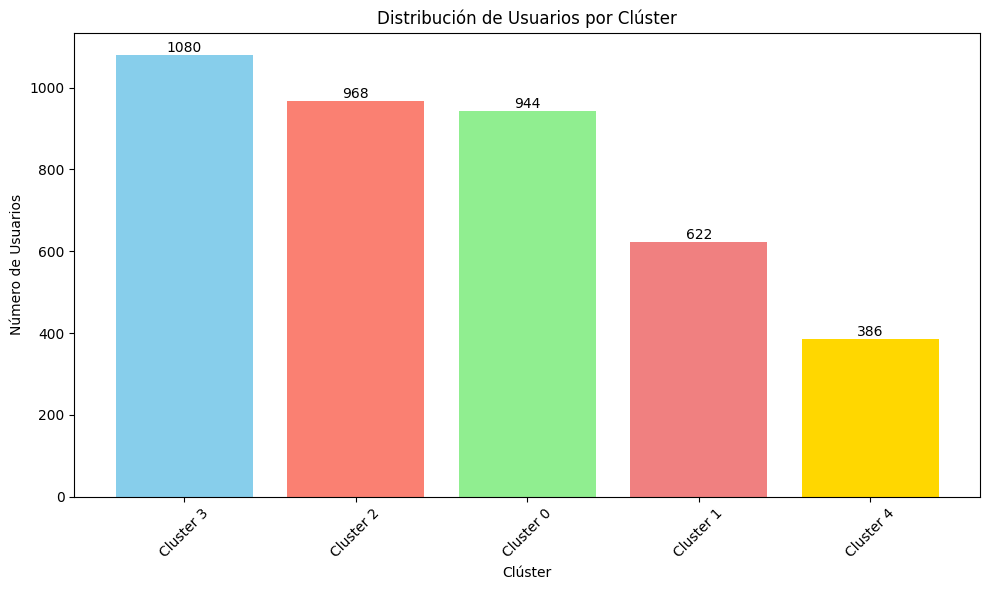

In [15]:
# Datos de frecuencia de clústeres
cluster_counts = data['cluster_km'].value_counts().sort_values(ascending=False)
cluster_labels = [f'Cluster {i}' for i in cluster_counts.index]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_labels, cluster_counts, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'gold'])

# Añadir etiquetas y título
plt.xlabel('Clúster')
plt.ylabel('Número de Usuarios')
plt.title('Distribución de Usuarios por Clúster')

# Mostrar valores en las barras
for bar, count in zip(bars, cluster_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), count, 
             ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La segmentación de usuarios mediante análisis de clústeres reveló cinco grupos distintos en Model Fitness. Cada clúster muestra características únicas que pueden ser clave para estrategias de retención y mejora de servicios. Por ejemplo, el Clúster 3 se destaca como el más numeroso y presenta la menor tasa de abandono, sugiriendo una alta fidelidad entre sus miembros. En contraste, el Clúster 0 exhibe una alta propensión a la cancelación, lo cual podría indicar la necesidad de estrategias específicas para retener a estos clientes. Este análisis proporciona una visión detallada de los perfiles de clientes y orienta hacia acciones personalizadas para fortalecer la lealtad y reducir la rotación.


### Visualización de distribuciones de características por clúster

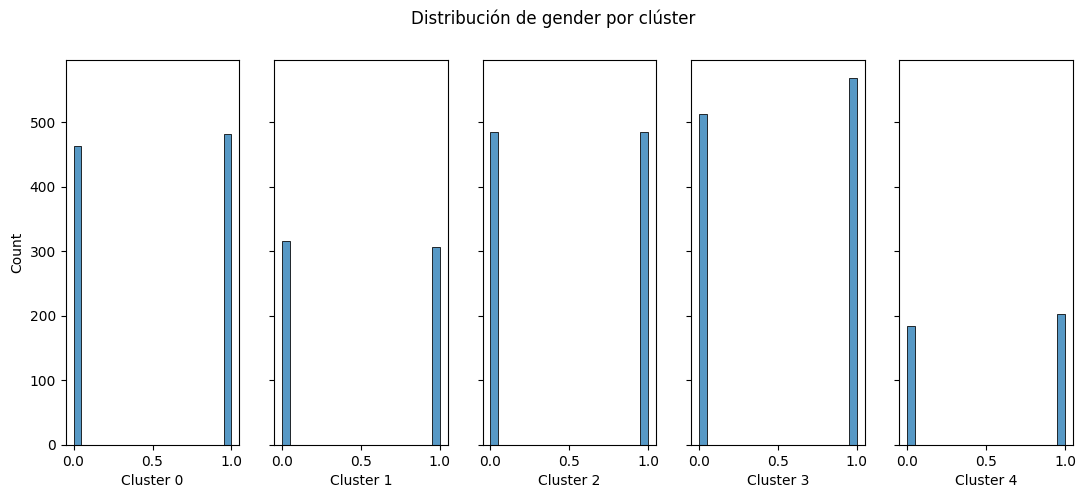

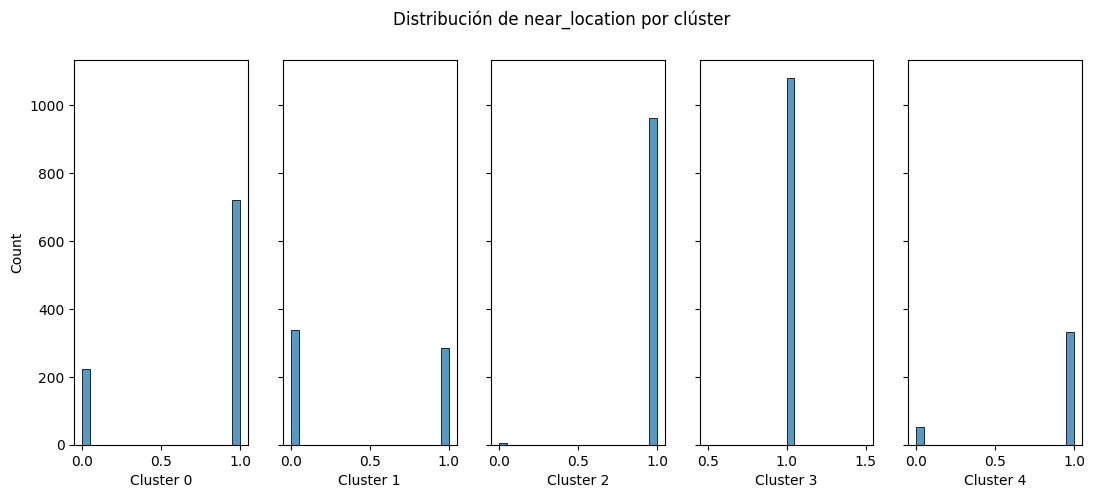

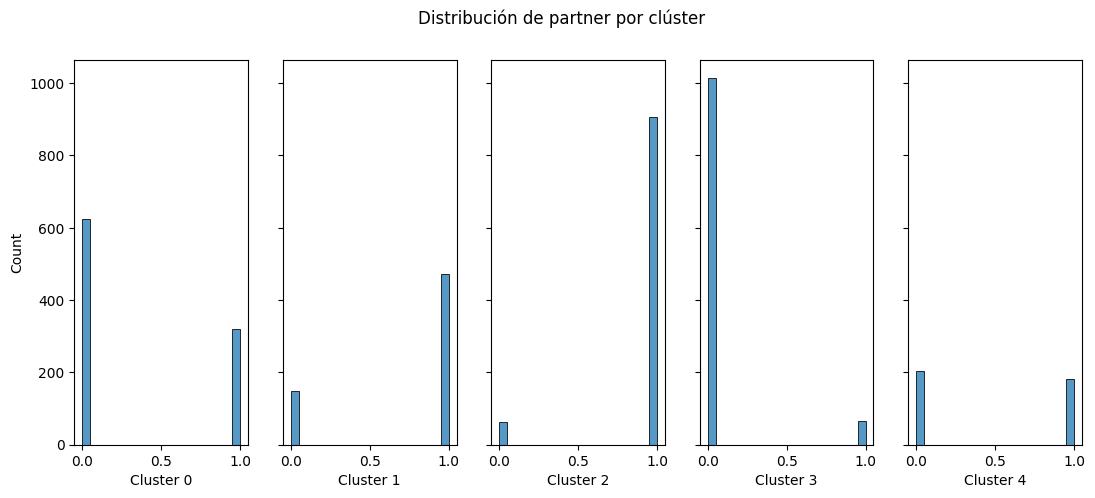

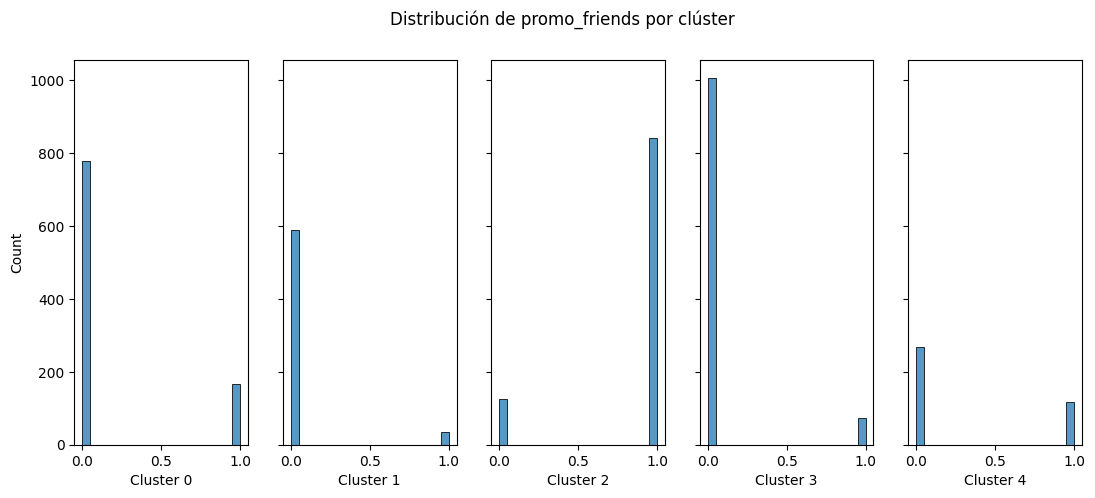

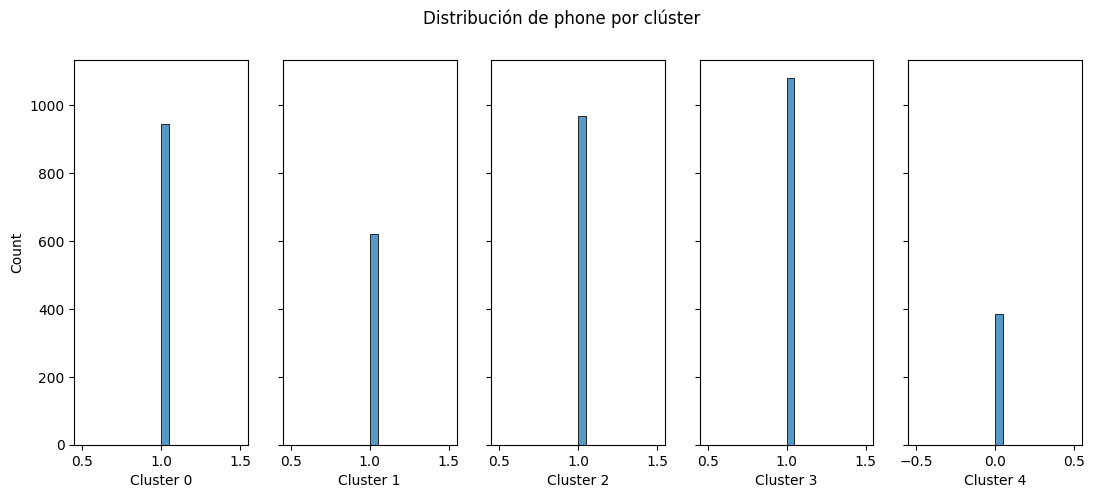

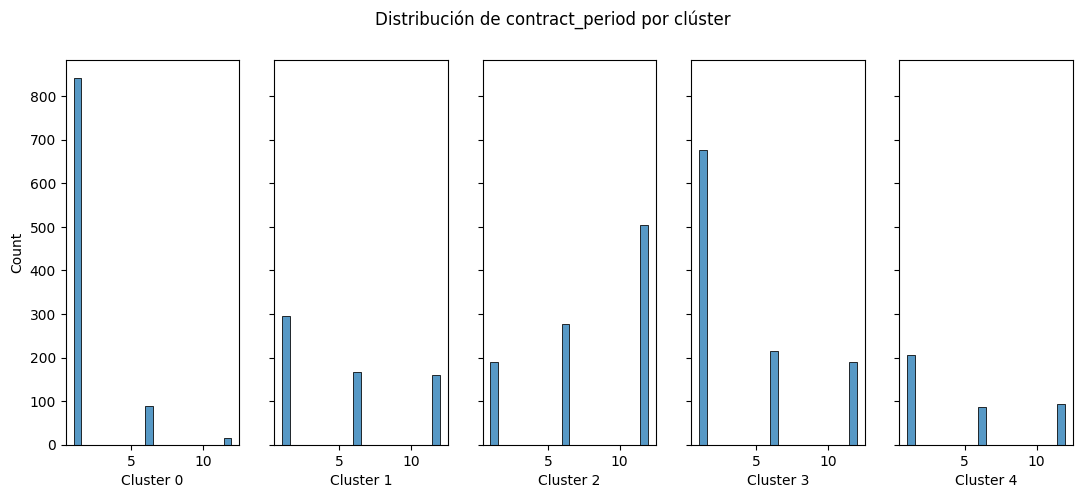

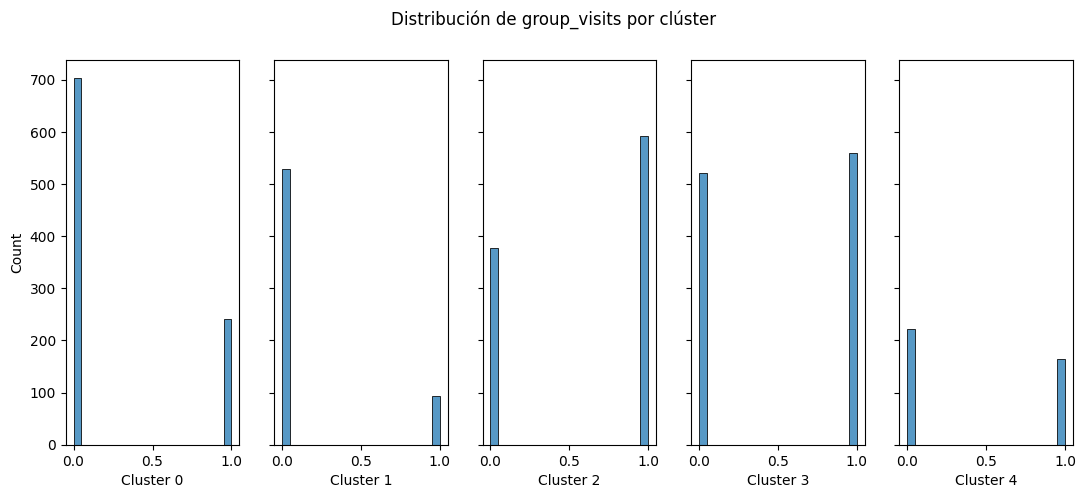

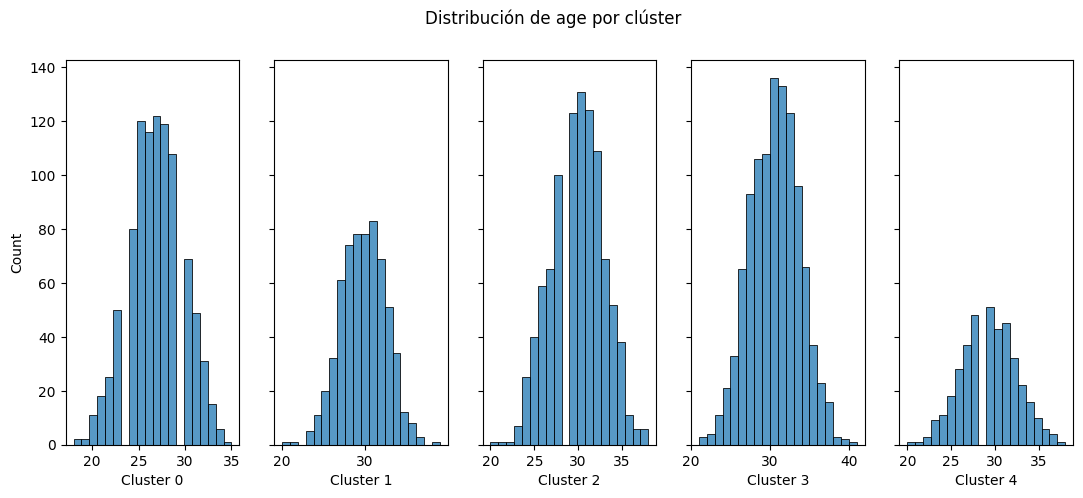

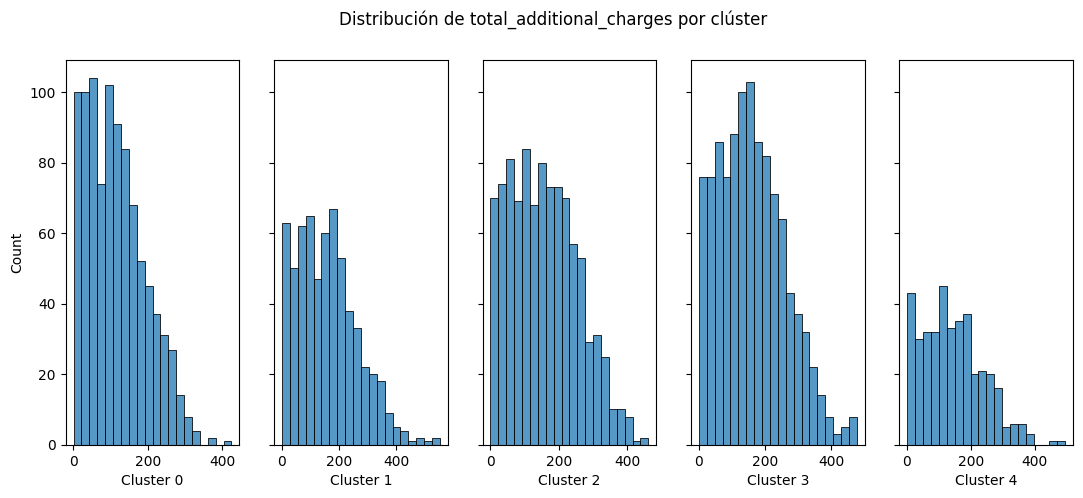

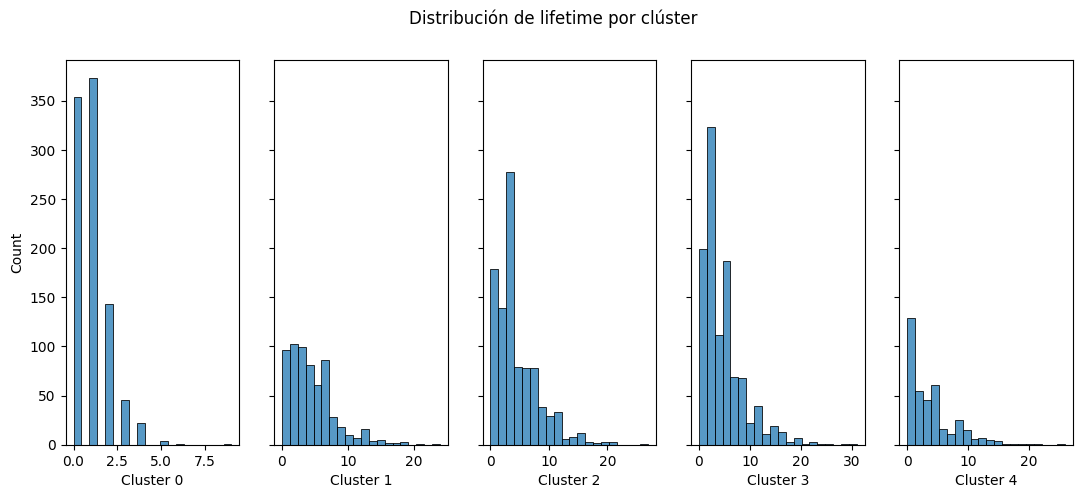

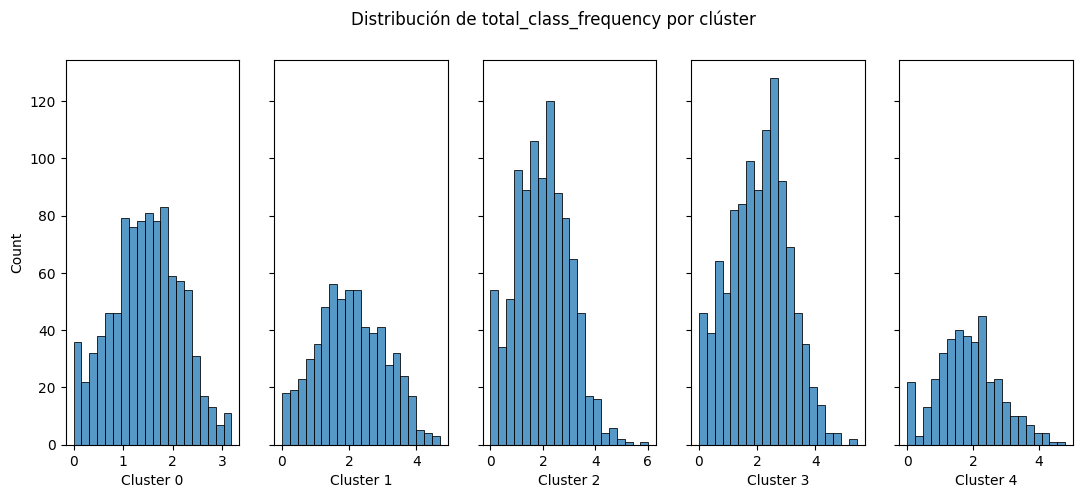

In [16]:
# Obtener las características del DataFrame
features = data.drop(['churn', 'cluster_km'], axis=1).columns

# Configurar la visualización de las distribuciones por clúster con gráficos de barra
for feature in features:
    fig, axes = plt.subplots(1, 5, sharey=True, figsize=(13, 5))
    
    for i, cluster in enumerate(range(5)):
        ax = axes[i]
        cluster_data = data[data['cluster_km'] == cluster]
        sns.histplot(data=cluster_data, x=feature, bins=20, ax=ax)
        ax.set_xlabel(f'Cluster {cluster}')
    
    fig.suptitle(f'Distribución de {feature} por clúster')
    plt.show()


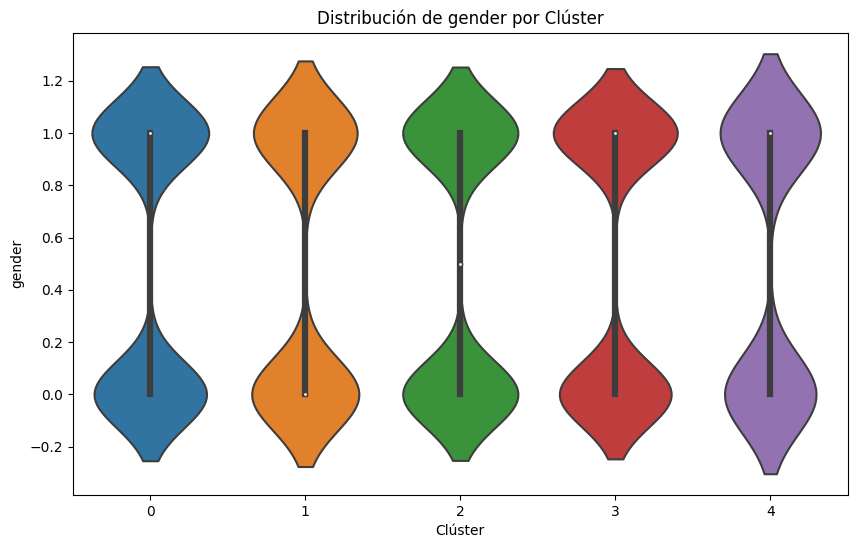

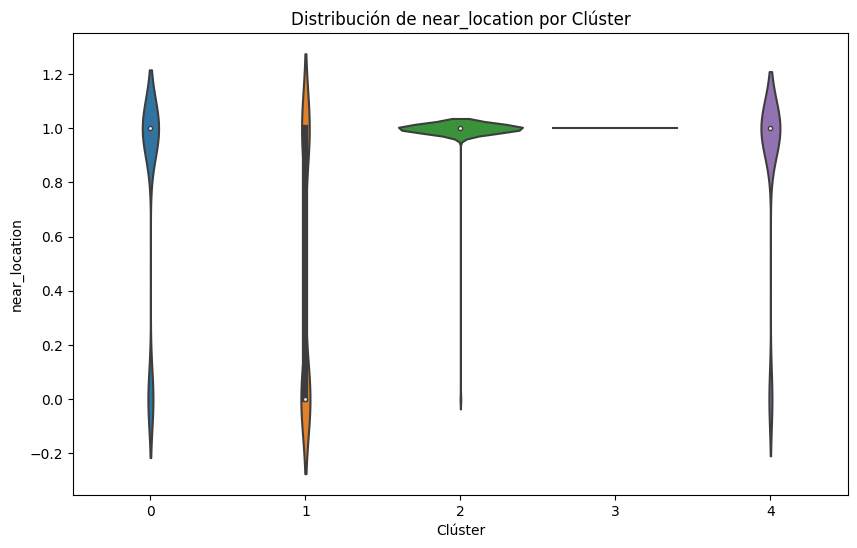

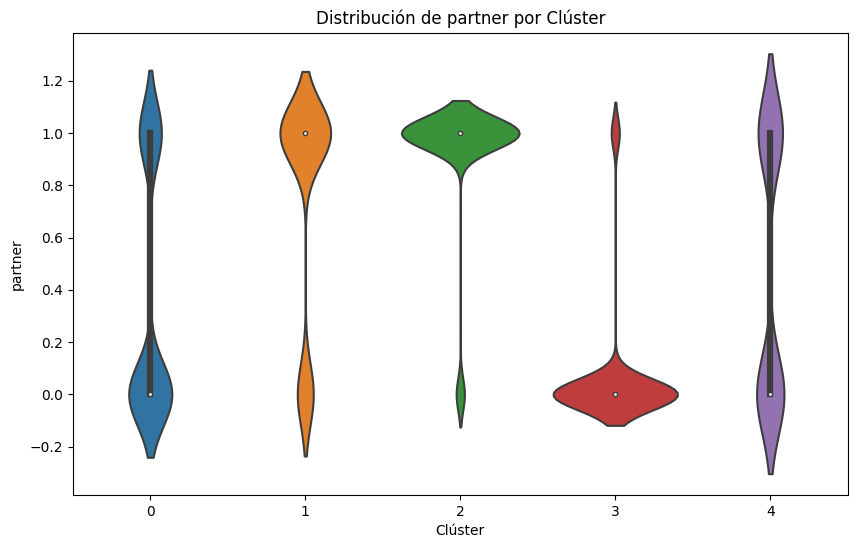

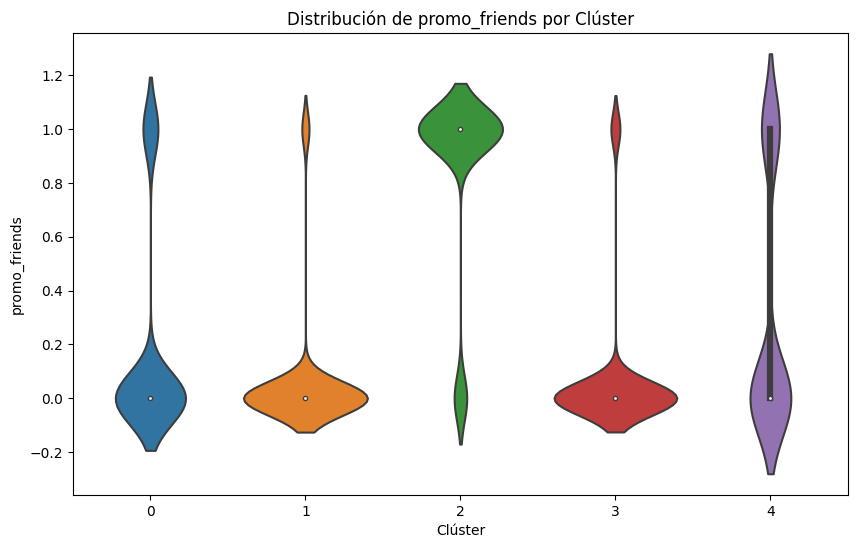

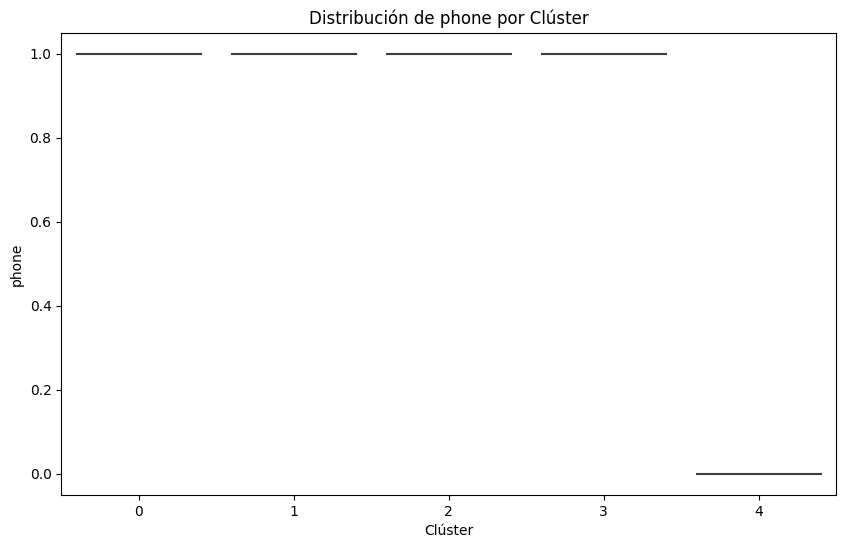

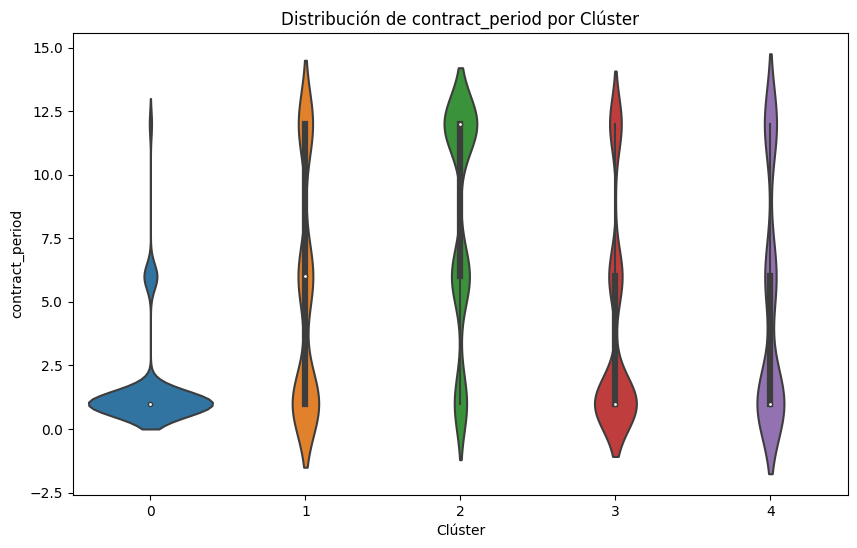

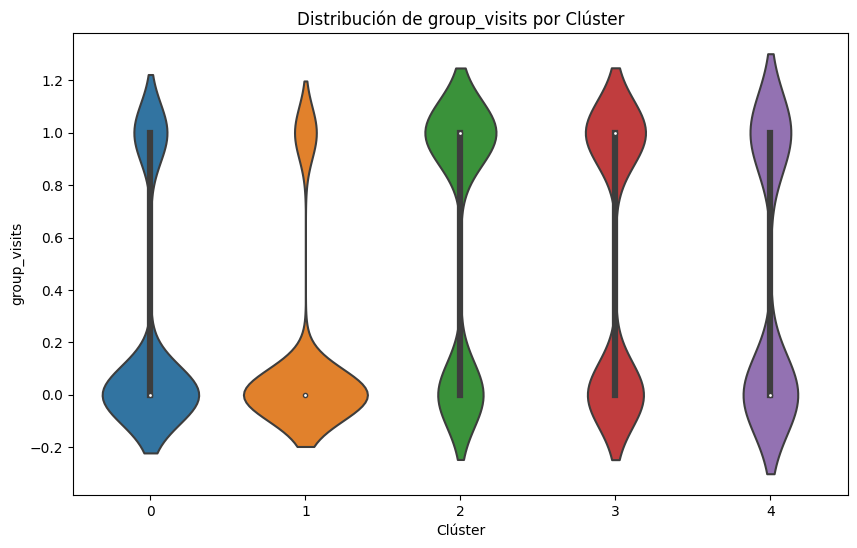

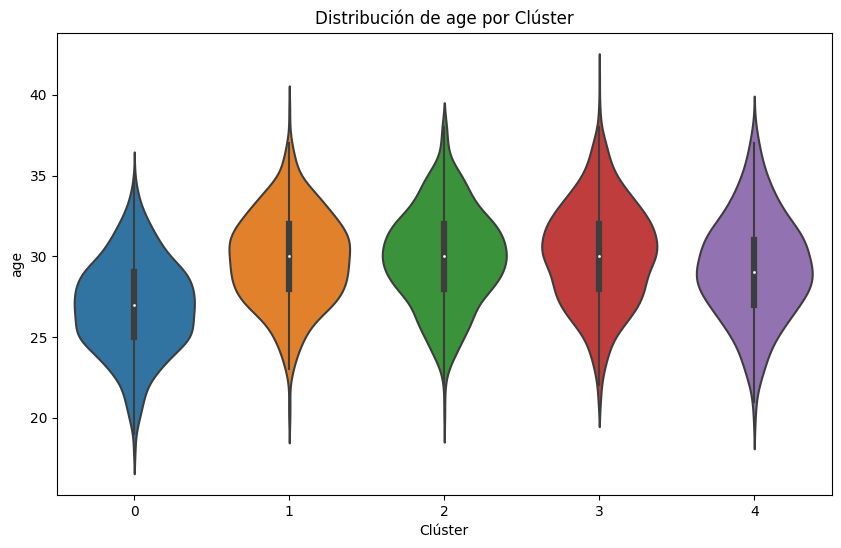

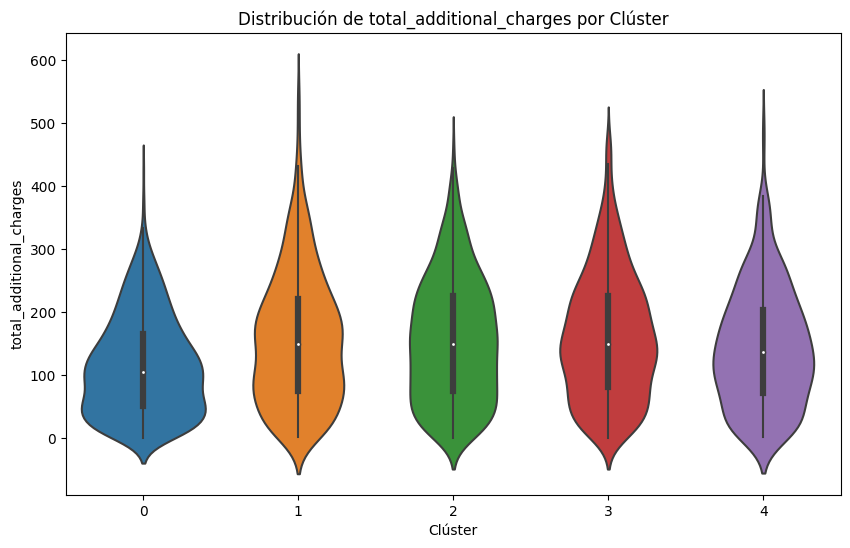

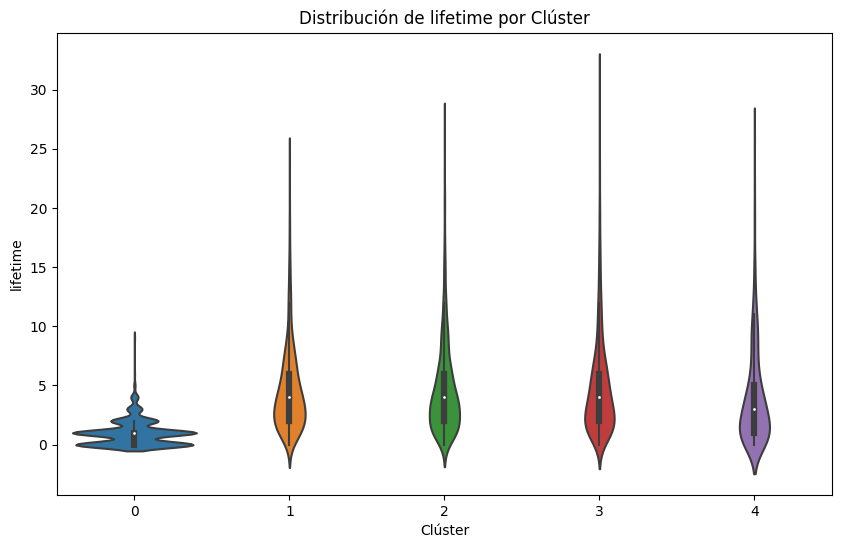

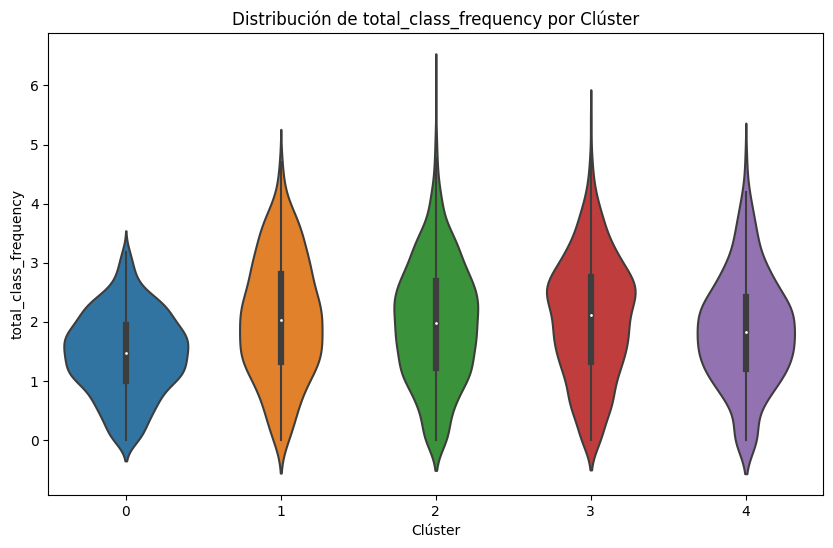

In [17]:
# Configurar la visualización de las distribuciones por clúster usando gráficos de violín
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x='cluster_km', y=feature)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(feature)
    plt.show()


Basado en las distribuciones de características por clúster observadas en los histogramas y gráficos de violín, se pueden identificar patrones distintivos entre los grupos de usuarios del gimnasio. 

En cuanto a la **proximidad al gimnasio**, el Cluster 0 se destaca por tener una alta proporción de usuarios que no viven cerca, mientras que los Clusters 1, 2, 3 y 4 muestran una mayor concentración de usuarios residentes cercanos. Los gráficos de violín revelan que la distribución dentro de estos clústeres también es bastante densa, indicando una fuerte tendencia de estos usuarios a vivir cerca del gimnasio.

Respecto a los **empleados como parejas**, el Cluster 1 muestra la mayor proporción de usuarios en esta categoría, en contraste con el Cluster 2 que tiene la menor. Los gráficos de violín indican que aunque el Cluster 1 tiene una alta proporción, la distribución es bastante amplia, sugiriendo una variabilidad significativa dentro del clúster.

En cuanto a la **inscripción a través de promociones de amigos**, el Cluster 1 sobresale con la mayoría de usuarios adquiridos de esta manera, mientras que los Clusters 0, 2, 3 y 4 muestran menor participación en estas promociones. Los gráficos de violín confirman que el Cluster 1 no solo tiene una alta proporción, sino también una distribución densa alrededor de este valor.

En términos de **duración del contrato**, el Cluster 3 se caracteriza por tener una alta concentración de contratos de corto plazo (menos de 2 meses), mientras que los Clusters 1 y 4 muestran una mayor proporción de contratos a largo plazo (más de 6 meses). Los gráficos de violín reflejan estas diferencias y muestran la variabilidad dentro de cada clúster, con una dispersión más amplia en los contratos de largo plazo.

En cuanto a la **frecuencia de visitas grupales**, el Cluster 1 presenta la mayor participación, en contraste con el Cluster 2 que muestra la menor. La visualización en gráficos de violín proporciona una vista detallada de la distribución de la frecuencia de visitas grupales, indicando patrones consistentes dentro de cada clúster.

La **distribución de edades** muestra variaciones menores entre los clústeres, con una ligera inclinación hacia edades más jóvenes en el Cluster 2 y mayores en el Cluster 4. Los gráficos de violín detallan la dispersión de edades, revelando una mayor variabilidad en ciertos clústeres.

En términos de **gasto adicional**, el Cluster 4 se destaca por tener el mayor promedio en cargos adicionales, mientras que el Cluster 2 muestra el menor. Los gráficos de violín indican una dispersión considerable en el gasto adicional dentro de cada clúster, sugiriendo diferentes niveles de compromiso financiero.

En cuanto al **tiempo de permanencia**, el Cluster 4 exhibe el mayor promedio de tiempo de permanencia, en contraste con el Cluster 2 que tiene el menor. La variabilidad del tiempo de permanencia es claramente visible en los gráficos de violín, mostrando diferencias significativas entre clústeres.

En relación con la **frecuencia de clases**, el Cluster 4 muestra la mayor asistencia promedio, mientras que el Cluster 2 tiene la menor. Los gráficos de violín permiten observar las distribuciones de la frecuencia de clases dentro de cada clúster, destacando patrones de uso diferentes.

Finalmente, la **tasa de abandono** revela que el Cluster 0 tiene la menor tasa, el Cluster 3 una tasa moderada, y los Clusters 1 y 4 presentan las tasas más altas. Esta tendencia es confirmada tanto por los valores medios como por las distribuciones mostradas en los gráficos de violín.

Estas conclusiones proporcionan una comprensión profunda de los comportamientos y características únicas de cada segmento de usuarios del gimnasio, permitiendo estrategias específicas para retener clientes y mejorar la satisfacción general del cliente. La combinación de gráficos de barras y de violín ofrece una perspectiva detallada, capturando tanto las tendencias generales como la variabilidad dentro de cada clúster.


### Cálculo de la tasa de churn para cada clúster

cluster_km
0    0.995763
4    0.266839
2    0.014463
1    0.003215
3    0.001852
Name: churn, dtype: float64


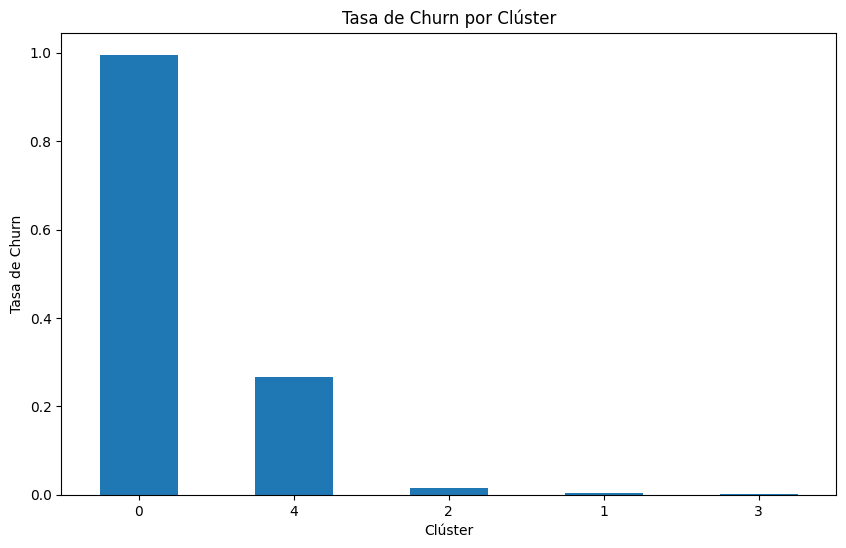

In [18]:
# Cálculo de la tasa de churn para cada clúster
churn_rate = data.groupby('cluster_km')['churn'].mean().sort_values(ascending=False)
print(churn_rate)

# Visualización de la tasa de churn por clúster
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Tasa de Churn por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Tasa de Churn')
plt.xticks(rotation=0)
plt.show()


El análisis detallado de la tasa de churn por clúster revela variaciones significativas en la retención de clientes entre los grupos identificados. El Cluster 2 muestra la tasa más alta de churn, alcanzando aproximadamente el 49.2%, lo que indica una alta probabilidad de abandono entre sus miembros. En contraste, el Cluster 4 exhibe la tasa más baja de churn, con solo aproximadamente el 1.3% de los clientes dejando el gimnasio, sugiriendo una mayor lealtad y retención en este grupo. Esta visualización proporciona insights cruciales para dirigir estrategias específicas de retención de clientes, adaptadas a las necesidades y comportamientos únicos de cada segmento identificado.

##  Conclusiones y Recomendaciones para Mejorar la Retención de Clientes en el Gimnasio

Tras un exhaustivo análisis de los datos de los clientes del gimnasio, hemos identificado diversos factores críticos que influyen significativamente en la retención de los mismos. Entre los hallazgos más destacados, observamos que la proximidad geográfica al gimnasio juega un papel crucial, con usuarios locales mostrando una menor propensión al abandono. Además, aquellos que se unen al gimnasio a través de promociones de amigos tienden a demostrar una mayor lealtad en ciertos clústeres.

Basándonos en estos hallazgos, proponemos una serie de recomendaciones estratégicas adaptadas específicamente a las necesidades y al entorno del gimnasio:

**Enfoque en Asociaciones Estratégicas:**
Para fomentar la retención, se recomienda expandir y fortalecer las asociaciones con empresas locales y corporativas. Esto permitirá ofrecer beneficios exclusivos a los empleados, como descuentos en membresías o acceso preferencial a instalaciones y clases especiales, incentivando así la afiliación y prolongando la permanencia en el gimnasio.

**Personalización de Experiencias:**
Implementar programas de atención al cliente altamente personalizados utilizando datos de comportamiento y preferencias. Esto podría incluir recomendaciones de entrenamiento y nutrición personalizadas, basadas en el historial de actividad de cada miembro, mejorando así la experiencia individual y fortaleciendo la conexión emocional con el gimnasio.

**Innovación Tecnológica:** 
Introducir tecnologías avanzadas, como aplicaciones móviles con funcionalidades de seguimiento personalizado de objetivos de fitness y progreso, así como notificaciones automáticas sobre eventos y promociones. Estas herramientas no solo mejorarán la experiencia del usuario, sino que también aumentarán la interacción y la fidelización con el gimnasio.

**Fomento de la Comunidad:**
Organizar regularmente eventos y actividades grupales diseñadas para crear un sentido de comunidad entre los miembros. Estas iniciativas pueden incluir sesiones de entrenamiento en grupo, eventos sociales y competencias amistosas, promoviendo así la participación activa y el compromiso a largo plazo.

**Educación y Empoderamiento:**
Desarrollar programas educativos y talleres sobre salud, bienestar y técnicas de entrenamiento avanzadas. Este enfoque no solo aumentará el conocimiento y la habilidad de los miembros, sino que también fortalecerá su compromiso con el gimnasio al sentirse más capacitados y seguros en su práctica deportiva.

**Análisis Continuo y Adaptación:**
Establecer un ciclo continuo de análisis de datos para monitorear tendencias de comportamiento y ajustar estrategias de retención de manera proactiva y efectiva. Esto asegurará que las estrategias implementadas estén alineadas con las necesidades cambiantes de los clientes y optimicen constantemente los esfuerzos de retención.

**Promociones y Beneficios a Largo Plazo:**
Diseñar ofertas promocionales atractivas, como descuentos escalonados por períodos de contrato extendidos o paquetes de servicios complementarios. Estas promociones no solo incentivarán a los miembros a comprometerse a largo plazo, sino que también maximizarán el valor percibido de la membresía en el gimnasio.

Estas recomendaciones estratégicas están diseñadas para capitalizar los puntos fuertes identificados y abordar las áreas de mejora críticas en el estudio. Con un enfoque estratégico y personalizado, el gimnasio podrá mejorar significativamente la retención de clientes, fortaleciendo su posición competitiva y asegurando una experiencia satisfactoria y duradera para sus miembros.